In [1]:
# Some imports that you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import nltk
import os

In [2]:
!pip install tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer



Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.9 MB/s eta 0:00:00:00:01


In [4]:
!pip install --upgrade --no-cache-dir gdown
if not os.path.exists("Reviews.csv"):
    !gdown 1_kLSwiRYtiXF7h9V1FlTqTapOHiYU5Mk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [83]:
df = pd.read_csv('Reviews.csv')
print(df.shape)

(568454, 10)


In [85]:
#Get an example review from the data
example = df['Text'] [12]
print(example)

My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.


In [86]:
#Import roBERTa 
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [87]:
#Gets a already pre-trained model for sentiment Analysis that was done
#by roBERTa using lots of twitter tweets
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [88]:
#encoded text so the model can understand
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)

In [90]:
#multi class have num score -1, 0, or 1?
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_post' : scores[2]
    }
    id_val = np.argmax(scores)
    if id_val == 2:
        num_score = 1
        bin_score = 1
    if id_val == 1:
        num_score = 0
        bin_score =0
    if id_val == 0:
        num_score =-1
        bin_score = 0
    return scores_dict, num_score, bin_score

In [91]:

res = {}
res_bin = {}
#for i, row in tqdm(df.head(100).iterrows(), total=100):
for i, row in tqdm(df[50000:100000].iterrows(), total=50000):
#for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        text=row['Text']
        #text=row['Summary']
        myid=row['Id']
        x, roberta_result, bin_score = polarity_scores_roberta(text)
        res[myid] = (roberta_result,x)
        res_bin[myid] = (bin_score,x)
    except RuntimeError:
        print(f'Broke for id {myid}')

  1%|          | 379/50000 [00:46<1:11:42, 11.53it/s]

Broke for id 50378


  1%|          | 535/50000 [01:05<1:11:30, 11.53it/s]

Broke for id 50534


  1%|▏         | 660/50000 [01:22<1:21:10, 10.13it/s]

Broke for id 50659


  1%|▏         | 688/50000 [01:25<1:13:03, 11.25it/s]

Broke for id 50686


  1%|▏         | 712/50000 [01:28<1:37:27,  8.43it/s]

Broke for id 50713


  2%|▏         | 904/50000 [01:52<1:44:05,  7.86it/s]

Broke for id 50903


  2%|▏         | 909/50000 [01:53<3:33:06,  3.84it/s]

Broke for id 50910


  2%|▏         | 991/50000 [02:06<3:16:24,  4.16it/s]

Broke for id 50992


  2%|▏         | 1020/50000 [02:11<1:45:01,  7.77it/s]

Broke for id 51021


  3%|▎         | 1315/50000 [02:49<1:10:07, 11.57it/s]

Broke for id 51314


  3%|▎         | 1342/50000 [02:52<1:25:48,  9.45it/s]

Broke for id 51341


  3%|▎         | 1427/50000 [03:02<1:20:25, 10.07it/s]

Broke for id 51428


  3%|▎         | 1473/50000 [03:08<1:10:52, 11.41it/s]

Broke for id 51471
Broke for id 51473
Broke for id 51475


  3%|▎         | 1561/50000 [03:19<1:14:09, 10.89it/s]

Broke for id 51559


  3%|▎         | 1584/50000 [03:21<1:07:48, 11.90it/s]

Broke for id 51583


  4%|▎         | 1754/50000 [03:42<1:38:16,  8.18it/s]

Broke for id 51755


  4%|▍         | 1902/50000 [03:59<1:08:54, 11.63it/s]

Broke for id 51901


  4%|▍         | 1973/50000 [04:08<1:17:43, 10.30it/s]

Broke for id 51972


  4%|▍         | 2233/50000 [04:41<2:04:10,  6.41it/s]

Broke for id 52234


  5%|▍         | 2277/50000 [04:47<3:43:33,  3.56it/s]

Broke for id 52278


  5%|▍         | 2386/50000 [05:01<1:22:37,  9.60it/s]

Broke for id 52385


  5%|▍         | 2441/50000 [05:09<2:53:33,  4.57it/s]

Broke for id 52442


  5%|▍         | 2498/50000 [05:17<1:21:51,  9.67it/s]

Broke for id 52497


  5%|▌         | 2503/50000 [05:18<1:55:02,  6.88it/s]

Broke for id 52502


  5%|▌         | 2513/50000 [05:18<51:01, 15.51it/s]  

Broke for id 52507
Broke for id 52508
Broke for id 52509
Broke for id 52510
Broke for id 52511
Broke for id 52512


  5%|▌         | 2522/50000 [05:20<1:26:06,  9.19it/s]

Broke for id 52520
Broke for id 52521


  5%|▌         | 2542/50000 [05:23<2:04:58,  6.33it/s]

Broke for id 52541


  5%|▌         | 2562/50000 [05:26<1:52:15,  7.04it/s]

Broke for id 52561


  5%|▌         | 2571/50000 [05:28<2:01:13,  6.52it/s]

Broke for id 52572
Broke for id 52573


  6%|▌         | 2907/50000 [06:11<1:39:46,  7.87it/s]

Broke for id 52908
Broke for id 52909


  6%|▌         | 2955/50000 [06:17<1:39:28,  7.88it/s]

Broke for id 52954


  6%|▌         | 2993/50000 [06:22<1:21:34,  9.60it/s]

Broke for id 52992


  7%|▋         | 3315/50000 [07:01<1:05:06, 11.95it/s]

Broke for id 53314


  7%|▋         | 3521/50000 [07:25<1:11:08, 10.89it/s]

Broke for id 53520


  7%|▋         | 3686/50000 [07:44<1:09:16, 11.14it/s]

Broke for id 53684


  8%|▊         | 3807/50000 [07:59<1:38:44,  7.80it/s]

Broke for id 53806


  8%|▊         | 3857/50000 [08:07<3:44:01,  3.43it/s]

Broke for id 53858


  8%|▊         | 3885/50000 [08:11<2:03:41,  6.21it/s]

Broke for id 53884


  8%|▊         | 4230/50000 [08:54<1:02:20, 12.24it/s]

Broke for id 54230


  9%|▉         | 4532/50000 [09:34<2:16:18,  5.56it/s]

Broke for id 54531


  9%|▉         | 4554/50000 [09:37<2:31:05,  5.01it/s]

Broke for id 54555


  9%|▉         | 4560/50000 [09:38<1:28:57,  8.51it/s]

Broke for id 54559
Broke for id 54561


  9%|▉         | 4711/50000 [09:58<1:03:14, 11.94it/s]

Broke for id 54710


 10%|█         | 5086/50000 [10:44<1:42:34,  7.30it/s]

Broke for id 55087


 11%|█         | 5370/50000 [11:19<1:19:42,  9.33it/s]

Broke for id 55372


 11%|█         | 5377/50000 [11:20<1:23:47,  8.88it/s]

Broke for id 55376


 11%|█         | 5390/50000 [11:21<1:33:34,  7.95it/s]

Broke for id 55389


 11%|█         | 5529/50000 [11:41<2:37:27,  4.71it/s]

Broke for id 55530


 11%|█▏        | 5702/50000 [12:10<1:44:44,  7.05it/s]

Broke for id 55703


 11%|█▏        | 5728/50000 [12:14<1:59:58,  6.15it/s]

Broke for id 55729


 11%|█▏        | 5730/50000 [12:14<2:41:06,  4.58it/s]

Broke for id 55731


 12%|█▏        | 5854/50000 [12:30<58:15, 12.63it/s]  

Broke for id 55853


 12%|█▏        | 6020/50000 [12:50<51:09, 14.33it/s]  

Broke for id 56017
Broke for id 56018


 12%|█▏        | 6024/50000 [12:50<1:02:50, 11.66it/s]

Broke for id 56024


 13%|█▎        | 6372/50000 [13:33<1:02:57, 11.55it/s]

Broke for id 56370


 13%|█▎        | 6496/50000 [13:48<1:11:06, 10.20it/s]

Broke for id 56495
Broke for id 56497


 13%|█▎        | 6618/50000 [14:04<2:35:07,  4.66it/s]

Broke for id 56619


 13%|█▎        | 6631/50000 [14:05<1:15:21,  9.59it/s]

Broke for id 56631


 13%|█▎        | 6740/50000 [14:21<1:10:21, 10.25it/s]

Broke for id 56739


 14%|█▎        | 6792/50000 [14:28<1:39:58,  7.20it/s]

Broke for id 56793


 14%|█▍        | 6920/50000 [14:44<1:10:28, 10.19it/s]

Broke for id 56919


 14%|█▍        | 7165/50000 [15:15<1:16:23,  9.35it/s]

Broke for id 57164


 16%|█▌        | 7810/50000 [16:26<1:07:42, 10.39it/s]

Broke for id 57809


 16%|█▌        | 8038/50000 [16:55<1:53:37,  6.15it/s]

Broke for id 58037


 16%|█▌        | 8086/50000 [17:01<1:34:17,  7.41it/s]

Broke for id 58085


 16%|█▋        | 8229/50000 [17:20<1:51:10,  6.26it/s]

Broke for id 58231


 17%|█▋        | 8260/50000 [17:24<56:00, 12.42it/s]  

Broke for id 58260


 17%|█▋        | 8327/50000 [17:32<1:08:06, 10.20it/s]

Broke for id 58326


 17%|█▋        | 8493/50000 [17:53<1:07:00, 10.32it/s]

Broke for id 58492


 17%|█▋        | 8655/50000 [18:12<1:48:19,  6.36it/s]

Broke for id 58654


 18%|█▊        | 8806/50000 [18:32<53:21, 12.87it/s]  

Broke for id 58803


 18%|█▊        | 8891/50000 [18:44<1:03:33, 10.78it/s]

Broke for id 58893


 18%|█▊        | 8897/50000 [18:45<2:11:18,  5.22it/s]

Broke for id 58898


 18%|█▊        | 8909/50000 [18:47<1:32:57,  7.37it/s]

Broke for id 58908


 18%|█▊        | 9179/50000 [19:16<1:25:22,  7.97it/s]

Broke for id 59180


 19%|█▊        | 9302/50000 [19:31<52:38, 12.88it/s]  

Broke for id 59302


 19%|█▉        | 9457/50000 [19:49<1:26:14,  7.84it/s]

Broke for id 59456
Broke for id 59457


 19%|█▉        | 9634/50000 [20:14<1:27:06,  7.72it/s]

Broke for id 59633


 19%|█▉        | 9649/50000 [20:17<2:01:27,  5.54it/s]

Broke for id 59650


 19%|█▉        | 9656/50000 [20:18<2:14:54,  4.98it/s]

Broke for id 59657


 19%|█▉        | 9663/50000 [20:19<1:52:34,  5.97it/s]

Broke for id 59662


 19%|█▉        | 9664/50000 [20:19<1:45:49,  6.35it/s]

Broke for id 59665


 19%|█▉        | 9674/50000 [20:21<1:15:27,  8.91it/s]

Broke for id 59674


 19%|█▉        | 9680/50000 [20:22<1:37:25,  6.90it/s]

Broke for id 59681


 19%|█▉        | 9712/50000 [20:27<1:26:42,  7.74it/s]

Broke for id 59714


 19%|█▉        | 9740/50000 [20:30<1:30:26,  7.42it/s]

Broke for id 59739


 20%|█▉        | 9767/50000 [20:34<1:18:37,  8.53it/s]

Broke for id 59766


 20%|█▉        | 9834/50000 [20:42<1:57:54,  5.68it/s]

Broke for id 59835


 20%|█▉        | 9958/50000 [20:56<56:05, 11.90it/s]  

Broke for id 59956


 20%|█▉        | 9960/50000 [20:56<57:27, 11.61it/s]

Broke for id 59960


 20%|█▉        | 9966/50000 [20:57<1:37:44,  6.83it/s]

Broke for id 59965


 20%|█▉        | 9977/50000 [20:58<1:22:49,  8.05it/s]

Broke for id 59978


 20%|██        | 10018/50000 [21:04<1:14:33,  8.94it/s]

Broke for id 60017


 20%|██        | 10052/50000 [21:08<1:07:52,  9.81it/s]

Broke for id 60050


 20%|██        | 10069/50000 [21:09<57:15, 11.62it/s]  

Broke for id 60068


 21%|██        | 10276/50000 [21:36<1:07:41,  9.78it/s]

Broke for id 60275


 21%|██        | 10364/50000 [21:47<1:14:47,  8.83it/s]

Broke for id 60363


 21%|██        | 10396/50000 [21:51<1:26:10,  7.66it/s]

Broke for id 60395


 21%|██        | 10491/50000 [22:03<1:16:21,  8.62it/s]

Broke for id 60490


 21%|██        | 10506/50000 [22:06<1:37:55,  6.72it/s]

Broke for id 60505


 21%|██        | 10615/50000 [22:22<1:00:35, 10.83it/s]

Broke for id 60613


 21%|██▏       | 10698/50000 [22:36<1:39:14,  6.60it/s]

Broke for id 60699


 21%|██▏       | 10711/50000 [22:38<2:32:16,  4.30it/s]

Broke for id 60712


 21%|██▏       | 10718/50000 [22:39<1:18:41,  8.32it/s]

Broke for id 60717


 21%|██▏       | 10726/50000 [22:40<1:29:48,  7.29it/s]

Broke for id 60727


 21%|██▏       | 10734/50000 [22:42<1:52:49,  5.80it/s]

Broke for id 60733


 22%|██▏       | 10845/50000 [22:56<53:56, 12.10it/s]  

Broke for id 60843


 22%|██▏       | 10929/50000 [23:10<1:40:04,  6.51it/s]

Broke for id 60928


 22%|██▏       | 10941/50000 [23:12<1:26:44,  7.50it/s]

Broke for id 60940


 22%|██▏       | 10996/50000 [23:18<48:30, 13.40it/s]  

Broke for id 60995


 22%|██▏       | 11064/50000 [23:30<1:47:58,  6.01it/s]

Broke for id 61065


 22%|██▏       | 11099/50000 [23:35<2:09:45,  5.00it/s]

Broke for id 61100


 22%|██▏       | 11104/50000 [23:35<1:24:01,  7.72it/s]

Broke for id 61103


 22%|██▏       | 11195/50000 [23:53<2:04:03,  5.21it/s]

Broke for id 61194


 22%|██▏       | 11245/50000 [24:00<1:56:48,  5.53it/s]

Broke for id 61247


 23%|██▎       | 11285/50000 [24:05<1:04:35,  9.99it/s]

Broke for id 61286


 23%|██▎       | 11307/50000 [24:07<1:00:23, 10.68it/s]

Broke for id 61306


 23%|██▎       | 11548/50000 [24:38<2:33:11,  4.18it/s]

Broke for id 61549


 23%|██▎       | 11728/50000 [24:59<54:16, 11.75it/s]  

Broke for id 61726


 24%|██▎       | 11772/50000 [25:05<3:19:37,  3.19it/s]

Broke for id 61773


 25%|██▍       | 12469/50000 [26:34<1:17:41,  8.05it/s]

Broke for id 62468


 26%|██▌       | 12960/50000 [27:40<1:16:46,  8.04it/s]

Broke for id 62959


 26%|██▋       | 13159/50000 [28:05<1:02:55,  9.76it/s]

Broke for id 63158


 26%|██▋       | 13163/50000 [28:06<1:04:16,  9.55it/s]

Broke for id 63162


 26%|██▋       | 13219/50000 [28:14<1:29:42,  6.83it/s]

Broke for id 63218


 27%|██▋       | 13262/50000 [28:22<1:21:36,  7.50it/s]

Broke for id 63263


 27%|██▋       | 13269/50000 [28:23<1:16:01,  8.05it/s]

Broke for id 63268


 27%|██▋       | 13359/50000 [28:37<2:17:11,  4.45it/s]

Broke for id 63358


 27%|██▋       | 13379/50000 [28:42<1:45:40,  5.78it/s]

Broke for id 63378


 27%|██▋       | 13403/50000 [28:45<1:35:32,  6.38it/s]

Broke for id 63402


 27%|██▋       | 13473/50000 [28:57<1:41:08,  6.02it/s]

Broke for id 63474


 27%|██▋       | 13545/50000 [29:12<1:20:07,  7.58it/s]

Broke for id 63544


 27%|██▋       | 13567/50000 [29:16<1:07:55,  8.94it/s]

Broke for id 63566


 27%|██▋       | 13605/50000 [29:23<1:25:02,  7.13it/s]

Broke for id 63606


 27%|██▋       | 13613/50000 [29:23<1:04:13,  9.44it/s]

Broke for id 63612


 27%|██▋       | 13705/50000 [29:38<1:13:55,  8.18it/s]

Broke for id 63704


 27%|██▋       | 13730/50000 [29:42<1:12:31,  8.34it/s]

Broke for id 63729


 27%|██▋       | 13739/50000 [29:43<1:04:11,  9.41it/s]

Broke for id 63738


 28%|██▊       | 13794/50000 [29:53<2:40:53,  3.75it/s]

Broke for id 63795


 29%|██▉       | 14562/50000 [31:30<56:16, 10.49it/s]  

Broke for id 64563


 29%|██▉       | 14697/50000 [31:45<54:47, 10.74it/s]  

Broke for id 64696


 29%|██▉       | 14701/50000 [31:46<56:31, 10.41it/s]  

Broke for id 64701


 31%|███       | 15273/50000 [33:01<43:47, 13.22it/s]  

Broke for id 65272


 31%|███       | 15443/50000 [33:23<1:19:58,  7.20it/s]

Broke for id 65442


 31%|███       | 15560/50000 [33:42<1:15:10,  7.64it/s]

Broke for id 65561


 31%|███       | 15574/50000 [33:44<1:12:48,  7.88it/s]

Broke for id 65573


 31%|███▏      | 15625/50000 [33:53<1:24:43,  6.76it/s]

Broke for id 65623


 31%|███▏      | 15640/50000 [33:55<1:03:33,  9.01it/s]

Broke for id 65639


 32%|███▏      | 15771/50000 [34:13<1:11:43,  7.95it/s]

Broke for id 65770


 32%|███▏      | 15839/50000 [34:22<1:00:28,  9.41it/s]

Broke for id 65838


 32%|███▏      | 15892/50000 [34:29<1:15:20,  7.55it/s]

Broke for id 65891


 32%|███▏      | 15935/50000 [34:33<47:01, 12.07it/s]  

Broke for id 65933


 32%|███▏      | 16142/50000 [34:56<55:35, 10.15it/s]  

Broke for id 66140


 32%|███▏      | 16214/50000 [35:07<1:32:44,  6.07it/s]

Broke for id 66215


 33%|███▎      | 16312/50000 [35:21<50:07, 11.20it/s]  

Broke for id 66311


 33%|███▎      | 16318/50000 [35:22<56:00, 10.02it/s]  

Broke for id 66317


 33%|███▎      | 16328/50000 [35:23<1:15:15,  7.46it/s]

Broke for id 66327


 33%|███▎      | 16466/50000 [35:39<1:08:21,  8.18it/s]

Broke for id 66465


 34%|███▎      | 16777/50000 [36:19<1:09:53,  7.92it/s]

Broke for id 66776


 34%|███▎      | 16842/50000 [36:32<1:04:47,  8.53it/s]

Broke for id 66841


 34%|███▎      | 16854/50000 [36:35<2:27:14,  3.75it/s]

Broke for id 66855


 34%|███▎      | 16873/50000 [36:39<1:36:43,  5.71it/s]

Broke for id 66874


 34%|███▍      | 16878/50000 [36:39<1:01:52,  8.92it/s]

Broke for id 66877


 34%|███▍      | 16881/50000 [36:40<48:10, 11.46it/s]  

Broke for id 66880


 34%|███▍      | 16906/50000 [36:44<1:17:24,  7.13it/s]

Broke for id 66905


 34%|███▍      | 16959/50000 [36:53<50:46, 10.85it/s]  

Broke for id 66958


 34%|███▍      | 17249/50000 [37:29<1:01:53,  8.82it/s]

Broke for id 67250


 35%|███▍      | 17262/50000 [37:31<1:25:17,  6.40it/s]

Broke for id 67263
Broke for id 67264


 35%|███▍      | 17285/50000 [37:34<57:52,  9.42it/s]  

Broke for id 67284


 35%|███▍      | 17304/50000 [37:38<1:01:24,  8.88it/s]

Broke for id 67304


 35%|███▍      | 17326/50000 [37:41<1:09:32,  7.83it/s]

Broke for id 67325


 35%|███▍      | 17332/50000 [37:42<1:01:59,  8.78it/s]

Broke for id 67331


 35%|███▌      | 17511/50000 [38:06<1:39:46,  5.43it/s]

Broke for id 67510
Broke for id 67512


 35%|███▌      | 17514/50000 [38:07<1:36:16,  5.62it/s]

Broke for id 67515
Broke for id 67516


 36%|███▌      | 17843/50000 [38:46<1:04:36,  8.30it/s]

Broke for id 67842


 36%|███▌      | 17854/50000 [38:47<46:15, 11.58it/s]  

Broke for id 67853


 36%|███▌      | 17972/50000 [39:02<1:09:36,  7.67it/s]

Broke for id 67973


 36%|███▌      | 18038/50000 [39:10<1:02:07,  8.58it/s]

Broke for id 68037


 37%|███▋      | 18446/50000 [39:59<53:03,  9.91it/s]  

Broke for id 68445


 37%|███▋      | 18667/50000 [40:25<50:27, 10.35it/s]  

Broke for id 68666


 37%|███▋      | 18701/50000 [40:29<55:19,  9.43it/s]  

Broke for id 68701


 37%|███▋      | 18702/50000 [40:30<1:07:46,  7.70it/s]


IndexError: index out of range in self

In [92]:
results_df = pd.DataFrame(res).T

results_df = results_df.reset_index().rename(columns ={'index': 'Id'})
results_df = results_df.merge(df, how="left")

results_df_bin = pd.DataFrame(res_bin).T

results_df_bin = results_df_bin.reset_index().rename(columns ={'index': 'Id'})

results_df_bin = results_df_bin.merge(df, how="left")

In [93]:
#results_df[['Score',0]].to_csv('multi-class-roberta.csv')
results_df[['Score',0]].to_csv('multi-class-roberta2.csv', mode='a', header=False)
#df.to_csv('my_csv.csv', mode='a', header=False)

In [94]:
#results_df_bin[['Score',0]].to_csv('binary-roberta.csv')
results_df_bin[['Score',0]].to_csv('binary-roberta2.csv', header=False, mode='a')

In [22]:


from sklearn.metrics import accuracy_score

# Get the actual labels from the dataset
y_true = results_df['Score']

# Get the predicted labels from the roBERTa output
#neutral or neg do 0. otherwise 1

y_pred_multi = results_df[0].tolist()
y_pred_bin = results_df_bin[0].tolist()
# Convert the predicted labels to multi based on a threshold
#y_true_multi = [1 if x > 3 else (0 if x == 3 else -1) for x in y_true]
y_true_multi = [1 if x > 3 else (0 if x == 3 else -1) for x in y_true]
y_true_binary = [1 if x > 3 else 0 for x in y_true]

In [25]:
#all rows
acc = accuracy_score(y_true_binary, y_pred_bin)
print("Accuracy: ", acc)

Accuracy:  0.8908994145822245


In [26]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='weighted')

0.8900932901141244

In [27]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='macro')

0.8464453143686317

In [28]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='weighted')

0.8397478971453769

In [29]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='macro')

0.6278784098139858

# 12k to 30 k

In [95]:
#all rows
acc = accuracy_score(y_true_binary, y_pred_bin)
print("Accuracy: ", acc)

Accuracy:  0.8905053210376277


In [96]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='weighted')

0.894818984515855

In [97]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='macro')

0.8577145490232154

In [98]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='weighted')

0.6578963635754246

In [99]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='macro')

0.5201439380730165

## Appended roBERTa results

In [109]:
bert = pd.read_csv('binary-roberta2.csv')
y_pred_bin = bert['0']
y_true = bert['Score']
y_true_binary = [1 if x > 3 else 0 for x in y_true]

In [102]:
#all rows
acc = accuracy_score(y_true_binary, y_pred_bin)
print("Accuracy: ", acc)

Accuracy:  0.8888957701120951


In [103]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='weighted')

0.888804378777034

In [104]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='macro')

0.8413884037630868

In [119]:
bert = pd.read_csv('multi-class-roberta2.csv')
y_pred_multi = bert['0']
y_true = bert['Score']
y_true_multi = [1 if x > 3 else 0 for x in y_true]

In [120]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='weighted')

0.7711611496119402

In [121]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='macro')

0.38808676703001366

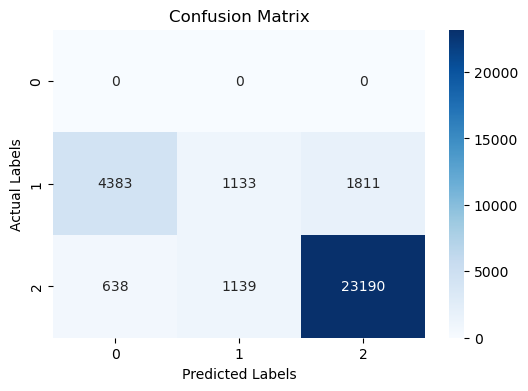

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true_multi, y_pred_multi)
cm
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show() 

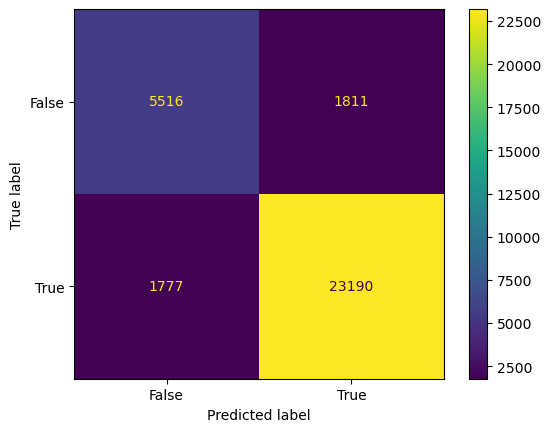

In [108]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(y_true_binary, y_pred_bin)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Bert Model

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [29]:
example = df['Text'] [15]
print(example)

My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.


In [30]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)

In [32]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'bert_1' : scores[0],
        'bert_2' : scores[1],
        'bert_3' : scores[2],
        'bert_4' : scores[3],
        'bert_5' : scores[4]
    }
    id_val = np.argmax(scores)
    if id_val==4:
        bin_score = 1
    if id_val==3:
        bin_score = 1
    if id_val == 2:
        bin_score = 0
    if id_val == 1:
        bin_score = 0
    if id_val == 0:
        bin_score = 0
    num_score = id_val+1
    return scores_dict, num_score, bin_score

In [34]:
res = {}
res_bin = {}
#for i, row in tqdm(df.head(50000).iterrows(), total=50000):
for i, row in tqdm(df[50000:100000].iterrows(), total=50000):
#for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        text=row['Text']
        #text=row['Summary']
        myid=row['Id']
        x, roberta_result, bin_score = polarity_scores_roberta(text)
        res[myid] = (roberta_result,x)
        res_bin[myid] = (bin_score,x)
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 135/50000 [00:20<1:56:58,  7.11it/s]

Broke for id 50134


  1%|          | 379/50000 [00:53<1:13:20, 11.28it/s]

Broke for id 50378


  1%|          | 535/50000 [01:14<1:14:28, 11.07it/s]

Broke for id 50534


  1%|▏         | 659/50000 [01:32<1:16:38, 10.73it/s]

Broke for id 50659


  1%|▏         | 687/50000 [01:36<1:21:57, 10.03it/s]

Broke for id 50686


  1%|▏         | 712/50000 [01:39<1:44:29,  7.86it/s]

Broke for id 50713


  2%|▏         | 904/50000 [02:07<1:56:03,  7.05it/s]

Broke for id 50903


  2%|▏         | 908/50000 [02:08<2:32:10,  5.38it/s]

Broke for id 50909
Broke for id 50910


  2%|▏         | 951/50000 [02:15<1:41:46,  8.03it/s]

Broke for id 50951


  2%|▏         | 990/50000 [02:20<2:16:52,  5.97it/s]

Broke for id 50992


  2%|▏         | 1020/50000 [02:24<1:50:51,  7.36it/s]

Broke for id 51021


  2%|▏         | 1109/50000 [02:37<1:37:55,  8.32it/s]

Broke for id 51108


  2%|▏         | 1188/50000 [02:47<2:27:13,  5.53it/s]

Broke for id 51189


  3%|▎         | 1316/50000 [03:04<1:11:59, 11.27it/s]

Broke for id 51314


  3%|▎         | 1342/50000 [03:07<1:31:49,  8.83it/s]

Broke for id 51341


  3%|▎         | 1428/50000 [03:17<1:13:21, 11.03it/s]

Broke for id 51428


  3%|▎         | 1472/50000 [03:24<1:32:29,  8.75it/s]

Broke for id 51471
Broke for id 51473


  3%|▎         | 1475/50000 [03:24<1:03:50, 12.67it/s]

Broke for id 51475


  3%|▎         | 1561/50000 [03:36<1:20:39, 10.01it/s]

Broke for id 51559


  3%|▎         | 1584/50000 [03:38<1:11:16, 11.32it/s]

Broke for id 51583


  3%|▎         | 1634/50000 [03:43<1:08:29, 11.77it/s]

Broke for id 51632


  3%|▎         | 1677/50000 [03:48<1:16:32, 10.52it/s]

Broke for id 51676


  4%|▎         | 1754/50000 [04:00<1:45:46,  7.60it/s]

Broke for id 51755


  4%|▍         | 1902/50000 [04:18<1:10:52, 11.31it/s]

Broke for id 51901


  4%|▍         | 1973/50000 [04:28<1:20:09,  9.99it/s]

Broke for id 51972


  4%|▍         | 2233/50000 [05:06<2:17:58,  5.77it/s]

Broke for id 52234


  5%|▍         | 2276/50000 [05:12<2:45:30,  4.81it/s]

Broke for id 52277
Broke for id 52278


  5%|▍         | 2378/50000 [05:25<1:12:55, 10.88it/s]

Broke for id 52377


  5%|▍         | 2386/50000 [05:26<1:11:37, 11.08it/s]

Broke for id 52385


  5%|▍         | 2441/50000 [05:33<2:03:13,  6.43it/s]

Broke for id 52442


  5%|▍         | 2470/50000 [05:36<1:12:29, 10.93it/s]

Broke for id 52469


  5%|▍         | 2498/50000 [05:40<1:25:59,  9.21it/s]

Broke for id 52497


  5%|▌         | 2503/50000 [05:41<2:03:26,  6.41it/s]

Broke for id 52502


  5%|▌         | 2513/50000 [05:41<52:35, 15.05it/s]  

Broke for id 52507
Broke for id 52508
Broke for id 52509
Broke for id 52510
Broke for id 52511
Broke for id 52512


  5%|▌         | 2522/50000 [05:43<1:32:37,  8.54it/s]

Broke for id 52520
Broke for id 52521


  5%|▌         | 2542/50000 [05:47<2:14:16,  5.89it/s]

Broke for id 52541


  5%|▌         | 2562/50000 [05:50<2:01:11,  6.52it/s]

Broke for id 52561


  5%|▌         | 2571/50000 [05:52<2:08:46,  6.14it/s]

Broke for id 52572
Broke for id 52573


  6%|▌         | 2907/50000 [06:37<1:48:34,  7.23it/s]

Broke for id 52908
Broke for id 52909


  6%|▌         | 2955/50000 [06:44<1:51:05,  7.06it/s]

Broke for id 52954


  6%|▌         | 2993/50000 [06:49<1:25:04,  9.21it/s]

Broke for id 52992


  7%|▋         | 3315/50000 [07:31<1:09:03, 11.27it/s]

Broke for id 53314


  7%|▋         | 3521/50000 [07:59<1:13:45, 10.50it/s]

Broke for id 53520


  7%|▋         | 3685/50000 [08:19<1:15:05, 10.28it/s]

Broke for id 53684


  8%|▊         | 3807/50000 [08:35<1:42:53,  7.48it/s]

Broke for id 53806


  8%|▊         | 3859/50000 [08:43<2:20:18,  5.48it/s]

Broke for id 53858


  8%|▊         | 3886/50000 [08:47<1:42:30,  7.50it/s]

Broke for id 53884


  8%|▊         | 3924/50000 [08:52<1:39:02,  7.75it/s]

Broke for id 53925


  8%|▊         | 4229/50000 [09:31<1:14:21, 10.26it/s]

Broke for id 54230


  9%|▉         | 4510/50000 [10:08<1:42:02,  7.43it/s]

Broke for id 54512


  9%|▉         | 4532/50000 [10:13<2:35:22,  4.88it/s]

Broke for id 54531


  9%|▉         | 4554/50000 [10:17<2:41:53,  4.68it/s]

Broke for id 54555


  9%|▉         | 4560/50000 [10:18<1:35:23,  7.94it/s]

Broke for id 54559
Broke for id 54561


  9%|▉         | 4599/50000 [10:24<1:22:43,  9.15it/s]

Broke for id 54598


  9%|▉         | 4710/50000 [10:38<1:08:05, 11.09it/s]

Broke for id 54710


 10%|▉         | 4987/50000 [11:18<1:10:35, 10.63it/s]

Broke for id 54986


 10%|█         | 5086/50000 [11:29<1:56:26,  6.43it/s]

Broke for id 55087


 11%|█         | 5289/50000 [11:55<1:41:53,  7.31it/s]

Broke for id 55288


 11%|█         | 5370/50000 [12:03<1:23:49,  8.87it/s]

Broke for id 55372


 11%|█         | 5377/50000 [12:04<1:28:27,  8.41it/s]

Broke for id 55376


 11%|█         | 5390/50000 [12:06<1:39:04,  7.50it/s]

Broke for id 55389


 11%|█         | 5529/50000 [12:27<3:00:46,  4.10it/s]

Broke for id 55530


 11%|█▏        | 5668/50000 [12:53<1:28:11,  8.38it/s]

Broke for id 55667


 11%|█▏        | 5705/50000 [12:59<1:15:49,  9.74it/s]

Broke for id 55703
Broke for id 55704


 11%|█▏        | 5724/50000 [13:01<1:29:49,  8.21it/s]

Broke for id 55725


 11%|█▏        | 5733/50000 [13:02<43:38, 16.90it/s]  

Broke for id 55729
Broke for id 55730
Broke for id 55731
Broke for id 55732


 12%|█▏        | 5854/50000 [13:17<59:41, 12.33it/s]  

Broke for id 55853


 12%|█▏        | 6020/50000 [13:39<54:17, 13.50it/s]  

Broke for id 56017
Broke for id 56018


 12%|█▏        | 6024/50000 [13:40<1:07:40, 10.83it/s]

Broke for id 56024


 12%|█▏        | 6106/50000 [13:51<1:23:30,  8.76it/s]

Broke for id 56105


 12%|█▏        | 6145/50000 [13:58<1:33:18,  7.83it/s]

Broke for id 56144


 13%|█▎        | 6372/50000 [14:27<1:08:17, 10.65it/s]

Broke for id 56370


 13%|█▎        | 6474/50000 [14:40<1:06:34, 10.90it/s]

Broke for id 56473


 13%|█▎        | 6496/50000 [14:43<1:14:31,  9.73it/s]

Broke for id 56495
Broke for id 56497


 13%|█▎        | 6620/50000 [15:00<1:36:10,  7.52it/s]

Broke for id 56619


 13%|█▎        | 6632/50000 [15:01<1:05:28, 11.04it/s]

Broke for id 56631


 13%|█▎        | 6693/50000 [15:10<1:38:17,  7.34it/s]

Broke for id 56694


 13%|█▎        | 6740/50000 [15:16<1:15:46,  9.51it/s]

Broke for id 56739


 14%|█▎        | 6792/50000 [15:23<1:53:30,  6.34it/s]

Broke for id 56793


 14%|█▍        | 6920/50000 [15:41<1:16:00,  9.45it/s]

Broke for id 56919


 14%|█▍        | 7165/50000 [16:14<1:16:36,  9.32it/s]

Broke for id 57164


 16%|█▌        | 7809/50000 [17:32<1:10:51,  9.92it/s]

Broke for id 57809


 16%|█▌        | 8013/50000 [17:58<1:24:16,  8.30it/s]

Broke for id 58012


 16%|█▌        | 8036/50000 [18:01<1:29:11,  7.84it/s]

Broke for id 58035
Broke for id 58037


 16%|█▌        | 8086/50000 [18:08<1:45:05,  6.65it/s]

Broke for id 58085


 16%|█▌        | 8114/50000 [18:11<1:14:41,  9.35it/s]

Broke for id 58113


 16%|█▋        | 8229/50000 [18:26<2:02:14,  5.70it/s]

Broke for id 58231


 17%|█▋        | 8260/50000 [18:29<1:00:06, 11.57it/s]

Broke for id 58260


 17%|█▋        | 8327/50000 [18:39<1:10:56,  9.79it/s]

Broke for id 58326


 17%|█▋        | 8493/50000 [19:02<1:10:29,  9.81it/s]

Broke for id 58492


 17%|█▋        | 8655/50000 [19:23<1:57:49,  5.85it/s]

Broke for id 58654


 17%|█▋        | 8672/50000 [19:25<1:18:16,  8.80it/s]

Broke for id 58671


 18%|█▊        | 8806/50000 [19:42<55:22, 12.40it/s]  

Broke for id 58803


 18%|█▊        | 8825/50000 [19:46<1:34:43,  7.24it/s]

Broke for id 58826


 18%|█▊        | 8892/50000 [19:57<1:04:07, 10.69it/s]

Broke for id 58893


 18%|█▊        | 8898/50000 [19:58<1:08:14, 10.04it/s]

Broke for id 58897
Broke for id 58898


 18%|█▊        | 8909/50000 [20:00<1:39:47,  6.86it/s]

Broke for id 58908


 18%|█▊        | 9182/50000 [20:31<1:05:17, 10.42it/s]

Broke for id 59180
Broke for id 59181


 19%|█▊        | 9302/50000 [20:47<56:13, 12.06it/s]  

Broke for id 59302


 19%|█▉        | 9455/50000 [21:04<1:07:31, 10.01it/s]

Broke for id 59454
Broke for id 59456
Broke for id 59457


 19%|█▉        | 9632/50000 [21:28<1:42:26,  6.57it/s]

Broke for id 59633


 19%|█▉        | 9649/50000 [21:32<2:21:41,  4.75it/s]

Broke for id 59650


 19%|█▉        | 9656/50000 [21:33<2:35:41,  4.32it/s]

Broke for id 59657


 19%|█▉        | 9663/50000 [21:35<1:57:04,  5.74it/s]

Broke for id 59662


 19%|█▉        | 9664/50000 [21:35<1:50:49,  6.07it/s]

Broke for id 59665


 19%|█▉        | 9674/50000 [21:36<1:17:53,  8.63it/s]

Broke for id 59674


 19%|█▉        | 9680/50000 [21:37<1:42:25,  6.56it/s]

Broke for id 59681


 19%|█▉        | 9712/50000 [21:42<1:33:12,  7.20it/s]

Broke for id 59714


 19%|█▉        | 9740/50000 [21:46<1:36:32,  6.95it/s]

Broke for id 59739


 20%|█▉        | 9767/50000 [21:51<1:24:56,  7.89it/s]

Broke for id 59766


 20%|█▉        | 9834/50000 [21:59<2:15:02,  4.96it/s]

Broke for id 59835


 20%|█▉        | 9958/50000 [22:13<54:45, 12.19it/s]  

Broke for id 59956


 20%|█▉        | 9960/50000 [22:13<56:52, 11.73it/s]

Broke for id 59960


 20%|█▉        | 9966/50000 [22:15<1:52:12,  5.95it/s]

Broke for id 59965


 20%|█▉        | 9977/50000 [22:16<1:30:50,  7.34it/s]

Broke for id 59978


 20%|██        | 10018/50000 [22:22<1:20:35,  8.27it/s]

Broke for id 60017


 20%|██        | 10052/50000 [22:26<1:08:58,  9.65it/s]

Broke for id 60050


 20%|██        | 10069/50000 [22:28<59:51, 11.12it/s]  

Broke for id 60068


 20%|██        | 10174/50000 [22:42<1:31:33,  7.25it/s]

Broke for id 60173


 21%|██        | 10276/50000 [22:58<1:14:18,  8.91it/s]

Broke for id 60275


 21%|██        | 10364/50000 [23:10<1:16:32,  8.63it/s]

Broke for id 60363


 21%|██        | 10396/50000 [23:15<1:35:19,  6.92it/s]

Broke for id 60395


 21%|██        | 10491/50000 [23:28<1:21:24,  8.09it/s]

Broke for id 60490


 21%|██        | 10506/50000 [23:30<1:48:30,  6.07it/s]

Broke for id 60505


 21%|██        | 10515/50000 [23:32<1:46:42,  6.17it/s]

Broke for id 60514


 21%|██        | 10615/50000 [23:47<1:00:17, 10.89it/s]

Broke for id 60613


 21%|██▏       | 10645/50000 [23:53<1:53:55,  5.76it/s]

Broke for id 60646


 21%|██▏       | 10698/50000 [24:02<1:48:14,  6.05it/s]

Broke for id 60699


 21%|██▏       | 10711/50000 [24:05<2:58:28,  3.67it/s]

Broke for id 60712


 21%|██▏       | 10718/50000 [24:06<1:26:00,  7.61it/s]

Broke for id 60717


 21%|██▏       | 10726/50000 [24:07<1:33:47,  6.98it/s]

Broke for id 60727


 21%|██▏       | 10734/50000 [24:09<2:08:40,  5.09it/s]

Broke for id 60733


 22%|██▏       | 10845/50000 [24:24<56:02, 11.64it/s]  

Broke for id 60843


 22%|██▏       | 10927/50000 [24:37<1:40:20,  6.49it/s]

Broke for id 60928


 22%|██▏       | 10940/50000 [24:39<1:44:06,  6.25it/s]

Broke for id 60940


 22%|██▏       | 10996/50000 [24:45<50:06, 12.97it/s]  

Broke for id 60995


 22%|██▏       | 11064/50000 [24:59<2:33:20,  4.23it/s]

Broke for id 61065


 22%|██▏       | 11099/50000 [25:04<2:26:25,  4.43it/s]

Broke for id 61100


 22%|██▏       | 11104/50000 [25:05<1:30:03,  7.20it/s]

Broke for id 61103


 22%|██▏       | 11189/50000 [25:23<2:44:29,  3.93it/s]

Broke for id 61190


 22%|██▏       | 11195/50000 [25:24<1:56:37,  5.55it/s]

Broke for id 61194


 22%|██▏       | 11245/50000 [25:32<2:18:33,  4.66it/s]

Broke for id 61247


 23%|██▎       | 11287/50000 [25:38<57:38, 11.19it/s]  

Broke for id 61286


 23%|██▎       | 11307/50000 [25:41<1:04:03, 10.07it/s]

Broke for id 61306


 23%|██▎       | 11547/50000 [26:15<1:39:43,  6.43it/s]

Broke for id 61548
Broke for id 61549


 23%|██▎       | 11727/50000 [26:37<55:34, 11.48it/s]  

Broke for id 61726


 24%|██▎       | 11772/50000 [26:44<3:48:53,  2.78it/s]

Broke for id 61773


 25%|██▍       | 12469/50000 [28:15<1:25:05,  7.35it/s]

Broke for id 62468


 26%|██▌       | 12900/50000 [29:20<3:11:15,  3.23it/s]

Broke for id 62901


 26%|██▌       | 12960/50000 [29:29<1:23:56,  7.35it/s]

Broke for id 62959


 26%|██▋       | 13159/50000 [29:55<1:07:20,  9.12it/s]

Broke for id 63158


 26%|██▋       | 13163/50000 [29:56<1:10:14,  8.74it/s]

Broke for id 63162


 26%|██▋       | 13219/50000 [30:06<1:44:47,  5.85it/s]

Broke for id 63218


 26%|██▋       | 13250/50000 [30:12<1:40:02,  6.12it/s]

Broke for id 63249


 27%|██▋       | 13262/50000 [30:13<1:15:14,  8.14it/s]

Broke for id 63263


 27%|██▋       | 13269/50000 [30:15<1:23:46,  7.31it/s]

Broke for id 63268


 27%|██▋       | 13354/50000 [30:29<2:33:52,  3.97it/s]

Broke for id 63355
Broke for id 63356


 27%|██▋       | 13359/50000 [30:29<1:21:32,  7.49it/s]

Broke for id 63358


 27%|██▋       | 13367/50000 [30:31<1:42:00,  5.99it/s]

Broke for id 63366


 27%|██▋       | 13379/50000 [30:34<2:03:03,  4.96it/s]

Broke for id 63378


 27%|██▋       | 13403/50000 [30:38<2:00:16,  5.07it/s]

Broke for id 63402


 27%|██▋       | 13425/50000 [30:42<1:09:42,  8.74it/s]

Broke for id 63423


 27%|██▋       | 13473/50000 [30:51<1:58:51,  5.12it/s]

Broke for id 63474


 27%|██▋       | 13545/50000 [31:04<1:19:24,  7.65it/s]

Broke for id 63544


 27%|██▋       | 13567/50000 [31:09<1:10:21,  8.63it/s]

Broke for id 63566


 27%|██▋       | 13607/50000 [31:17<1:08:40,  8.83it/s]

Broke for id 63606


 27%|██▋       | 13612/50000 [31:17<1:10:47,  8.57it/s]

Broke for id 63612


 27%|██▋       | 13705/50000 [31:33<1:20:32,  7.51it/s]

Broke for id 63704


 27%|██▋       | 13730/50000 [31:38<1:17:42,  7.78it/s]

Broke for id 63729


 27%|██▋       | 13738/50000 [31:39<1:04:40,  9.34it/s]

Broke for id 63738


 28%|██▊       | 13794/50000 [31:52<4:30:37,  2.23it/s]

Broke for id 63795


 28%|██▊       | 13853/50000 [32:01<1:05:50,  9.15it/s]

Broke for id 63852


 29%|██▊       | 14267/50000 [32:56<51:31, 11.56it/s]  

Broke for id 64267


 29%|██▊       | 14302/50000 [33:01<1:20:53,  7.36it/s]

Broke for id 64303


 29%|██▊       | 14348/50000 [33:06<1:25:24,  6.96it/s]

Broke for id 64349


 29%|██▉       | 14563/50000 [33:36<51:15, 11.52it/s]  

Broke for id 64563


 29%|██▉       | 14697/50000 [33:53<57:52, 10.17it/s]  

Broke for id 64696


 29%|██▉       | 14701/50000 [33:53<59:21,  9.91it/s]  

Broke for id 64701


 30%|██▉       | 14922/50000 [34:26<1:20:20,  7.28it/s]

Broke for id 64921


 30%|███       | 15052/50000 [34:47<59:52,  9.73it/s]  

Broke for id 65051


 31%|███       | 15274/50000 [35:14<43:53, 13.19it/s]  

Broke for id 65272


 31%|███       | 15443/50000 [35:38<1:28:13,  6.53it/s]

Broke for id 65442


 31%|███       | 15508/50000 [35:49<1:36:00,  5.99it/s]

Broke for id 65509


 31%|███       | 15560/50000 [35:59<1:20:30,  7.13it/s]

Broke for id 65561


 31%|███       | 15574/50000 [36:01<1:20:14,  7.15it/s]

Broke for id 65573


 31%|███       | 15620/50000 [36:10<1:41:35,  5.64it/s]

Broke for id 65621


 31%|███▏      | 15625/50000 [36:11<1:03:10,  9.07it/s]

Broke for id 65623


 31%|███▏      | 15640/50000 [36:13<1:05:53,  8.69it/s]

Broke for id 65639


 31%|███▏      | 15727/50000 [36:26<1:13:03,  7.82it/s]

Broke for id 65726


 32%|███▏      | 15771/50000 [36:32<1:16:30,  7.46it/s]

Broke for id 65770


 32%|███▏      | 15839/50000 [36:41<1:05:41,  8.67it/s]

Broke for id 65838


 32%|███▏      | 15892/50000 [36:48<1:12:59,  7.79it/s]

Broke for id 65891


 32%|███▏      | 15935/50000 [36:53<49:01, 11.58it/s]  

Broke for id 65933


 32%|███▏      | 16142/50000 [37:18<58:40,  9.62it/s]  

Broke for id 66140


 32%|███▏      | 16214/50000 [37:28<1:10:09,  8.03it/s]

Broke for id 66215


 32%|███▏      | 16244/50000 [37:33<1:28:23,  6.37it/s]

Broke for id 66243


 33%|███▎      | 16312/50000 [37:41<51:06, 10.98it/s]  

Broke for id 66311


 33%|███▎      | 16318/50000 [37:42<59:07,  9.49it/s]  

Broke for id 66317


 33%|███▎      | 16328/50000 [37:43<1:23:42,  6.70it/s]

Broke for id 66327


 33%|███▎      | 16464/50000 [38:02<1:26:35,  6.45it/s]

Broke for id 66465


 33%|███▎      | 16505/50000 [38:07<1:21:07,  6.88it/s]

Broke for id 66504


 34%|███▎      | 16777/50000 [38:45<1:21:27,  6.80it/s]

Broke for id 66776


 34%|███▎      | 16811/50000 [38:54<1:42:44,  5.38it/s]

Broke for id 66810


 34%|███▎      | 16827/50000 [38:58<1:40:02,  5.53it/s]

Broke for id 66829


 34%|███▎      | 16842/50000 [39:00<1:09:05,  8.00it/s]

Broke for id 66841


 34%|███▎      | 16853/50000 [39:02<1:29:39,  6.16it/s]

Broke for id 66852


 34%|███▎      | 16854/50000 [39:02<2:00:42,  4.58it/s]

Broke for id 66855


 34%|███▎      | 16873/50000 [39:07<1:50:57,  4.98it/s]

Broke for id 66874


 34%|███▍      | 16878/50000 [39:07<1:08:53,  8.01it/s]

Broke for id 66877


 34%|███▍      | 16880/50000 [39:07<55:32,  9.94it/s]  

Broke for id 66880


 34%|███▍      | 16884/50000 [39:08<1:08:38,  8.04it/s]

Broke for id 66885


 34%|███▍      | 16906/50000 [39:12<1:27:35,  6.30it/s]

Broke for id 66905


 34%|███▍      | 16959/50000 [39:22<53:16, 10.34it/s]  

Broke for id 66958


 34%|███▍      | 17183/50000 [39:50<59:46,  9.15it/s]  

Broke for id 67182


 34%|███▍      | 17249/50000 [40:01<1:08:19,  7.99it/s]

Broke for id 67250


 35%|███▍      | 17262/50000 [40:03<1:38:22,  5.55it/s]

Broke for id 67263
Broke for id 67264


 35%|███▍      | 17273/50000 [40:05<1:40:23,  5.43it/s]

Broke for id 67272


 35%|███▍      | 17284/50000 [40:06<1:01:13,  8.91it/s]

Broke for id 67284


 35%|███▍      | 17298/50000 [40:09<1:01:03,  8.93it/s]

Broke for id 67297


 35%|███▍      | 17303/50000 [40:09<1:09:07,  7.88it/s]

Broke for id 67304


 35%|███▍      | 17310/50000 [40:10<1:19:05,  6.89it/s]

Broke for id 67311


 35%|███▍      | 17326/50000 [40:13<1:16:05,  7.16it/s]

Broke for id 67325


 35%|███▍      | 17332/50000 [40:14<1:07:52,  8.02it/s]

Broke for id 67331


 35%|███▌      | 17509/50000 [40:39<1:26:25,  6.27it/s]

Broke for id 67510
Broke for id 67512


 35%|███▌      | 17514/50000 [40:39<1:00:50,  8.90it/s]

Broke for id 67515
Broke for id 67516


 35%|███▌      | 17643/50000 [40:57<49:18, 10.94it/s]  

Broke for id 67642


 36%|███▌      | 17843/50000 [41:23<1:11:27,  7.50it/s]

Broke for id 67842


 36%|███▌      | 17854/50000 [41:24<49:41, 10.78it/s]  

Broke for id 67853


 36%|███▌      | 17915/50000 [41:33<1:13:47,  7.25it/s]

Broke for id 67916


 36%|███▌      | 17972/50000 [41:41<1:16:56,  6.94it/s]

Broke for id 67973


 36%|███▌      | 18038/50000 [41:50<1:10:22,  7.57it/s]

Broke for id 68037


 37%|███▋      | 18446/50000 [42:42<1:00:31,  8.69it/s]

Broke for id 68445


 37%|███▋      | 18521/50000 [42:52<1:05:18,  8.03it/s]

Broke for id 68520


 37%|███▋      | 18667/50000 [43:10<52:48,  9.89it/s]  

Broke for id 68666


 37%|███▋      | 18700/50000 [43:16<1:12:58,  7.15it/s]

Broke for id 68701


 37%|███▋      | 18702/50000 [43:16<1:34:11,  5.54it/s]

Broke for id 68703


 38%|███▊      | 18779/50000 [43:27<54:40,  9.52it/s]  

Broke for id 68778


 38%|███▊      | 18791/50000 [43:29<1:10:21,  7.39it/s]

Broke for id 68790


 38%|███▊      | 18823/50000 [43:33<43:30, 11.94it/s]  

Broke for id 68823


 38%|███▊      | 19026/50000 [44:03<43:42, 11.81it/s]  

Broke for id 69024
Broke for id 69025


 38%|███▊      | 19052/50000 [44:07<52:36,  9.81it/s]  

Broke for id 69051


 38%|███▊      | 19141/50000 [44:17<1:39:11,  5.19it/s]

Broke for id 69142


 38%|███▊      | 19193/50000 [44:23<50:39, 10.14it/s]  

Broke for id 69191


 38%|███▊      | 19241/50000 [44:29<53:24,  9.60it/s]  

Broke for id 69240


 39%|███▊      | 19263/50000 [44:33<1:27:34,  5.85it/s]

Broke for id 69264


 39%|███▊      | 19277/50000 [44:35<1:08:53,  7.43it/s]

Broke for id 69277


 39%|███▊      | 19279/50000 [44:36<1:16:09,  6.72it/s]

Broke for id 69280


 39%|███▊      | 19352/50000 [44:46<1:11:17,  7.16it/s]

Broke for id 69351


 39%|███▉      | 19501/50000 [45:04<1:05:21,  7.78it/s]

Broke for id 69500


 40%|███▉      | 19767/50000 [45:40<1:06:16,  7.60it/s]

Broke for id 69767


 40%|███▉      | 19834/50000 [45:48<40:19, 12.47it/s]  

Broke for id 69832


 40%|████      | 20133/50000 [46:39<3:22:32,  2.46it/s]

Broke for id 70134


 40%|████      | 20175/50000 [46:46<1:26:18,  5.76it/s]

Broke for id 70174


 40%|████      | 20241/50000 [47:02<1:10:15,  7.06it/s]

Broke for id 70240


 41%|████      | 20309/50000 [47:15<1:11:52,  6.88it/s]

Broke for id 70308


 41%|████      | 20316/50000 [47:15<59:20,  8.34it/s]  

Broke for id 70315
Broke for id 70317


 41%|████      | 20347/50000 [47:23<1:19:46,  6.19it/s]

Broke for id 70346


 41%|████▏     | 20718/50000 [48:12<44:09, 11.05it/s]  

Broke for id 70717


 42%|████▏     | 20755/50000 [48:17<1:39:01,  4.92it/s]

Broke for id 70754


 42%|████▏     | 20846/50000 [48:28<53:46,  9.04it/s]  

Broke for id 70848


 42%|████▏     | 20964/50000 [48:42<58:30,  8.27it/s]  

Broke for id 70962


 42%|████▏     | 20989/50000 [48:44<48:54,  9.89it/s]  

Broke for id 70989


 42%|████▏     | 21082/50000 [48:57<49:48,  9.67it/s]  

Broke for id 71081


 42%|████▏     | 21115/50000 [49:02<56:03,  8.59it/s]  

Broke for id 71117


 42%|████▏     | 21121/50000 [49:04<1:20:20,  5.99it/s]

Broke for id 71120


 42%|████▏     | 21123/50000 [49:04<1:31:06,  5.28it/s]

Broke for id 71124
Broke for id 71125
Broke for id 71126


 42%|████▏     | 21134/50000 [49:05<49:53,  9.64it/s]  

Broke for id 71131
Broke for id 71132
Broke for id 71133
Broke for id 71135


 42%|████▏     | 21145/50000 [49:07<1:16:02,  6.32it/s]

Broke for id 71144


 42%|████▏     | 21156/50000 [49:09<58:25,  8.23it/s]  

Broke for id 71155


 42%|████▏     | 21162/50000 [49:10<1:37:02,  4.95it/s]

Broke for id 71163


 42%|████▏     | 21171/50000 [49:12<1:22:49,  5.80it/s]

Broke for id 71173


 43%|████▎     | 21339/50000 [49:37<1:05:47,  7.26it/s]

Broke for id 71338


 43%|████▎     | 21386/50000 [49:46<1:03:21,  7.53it/s]

Broke for id 71385


 43%|████▎     | 21391/50000 [49:47<43:41, 10.91it/s]  

Broke for id 71389


 43%|████▎     | 21587/50000 [50:16<58:27,  8.10it/s]  

Broke for id 71586


 43%|████▎     | 21662/50000 [50:26<55:04,  8.57it/s]  

Broke for id 71661


 43%|████▎     | 21664/50000 [50:26<1:10:57,  6.65it/s]

Broke for id 71665


 43%|████▎     | 21716/50000 [50:37<1:59:15,  3.95it/s]

Broke for id 71717


 44%|████▎     | 21769/50000 [50:48<1:35:47,  4.91it/s]

Broke for id 71770


 44%|████▎     | 21784/50000 [50:51<1:23:27,  5.64it/s]

Broke for id 71783


 44%|████▎     | 21821/50000 [50:59<1:43:02,  4.56it/s]

Broke for id 71822


 44%|████▎     | 21828/50000 [51:01<1:55:26,  4.07it/s]

Broke for id 71829


 44%|████▎     | 21847/50000 [51:05<1:24:26,  5.56it/s]

Broke for id 71846


 44%|████▍     | 22001/50000 [51:25<1:21:29,  5.73it/s]

Broke for id 72000


 44%|████▍     | 22004/50000 [51:26<1:44:40,  4.46it/s]

Broke for id 72005


 44%|████▍     | 22036/50000 [51:31<1:11:02,  6.56it/s]

Broke for id 72037


 44%|████▍     | 22038/50000 [51:31<1:02:00,  7.52it/s]

Broke for id 72039


 44%|████▍     | 22072/50000 [51:38<1:36:49,  4.81it/s]

Broke for id 72073


 44%|████▍     | 22080/50000 [51:39<1:23:28,  5.57it/s]

Broke for id 72081
Broke for id 72082


 44%|████▍     | 22250/50000 [52:03<1:14:08,  6.24it/s]

Broke for id 72251


 45%|████▍     | 22255/50000 [52:03<54:18,  8.52it/s]  

Broke for id 72254


 45%|████▍     | 22329/50000 [52:13<48:02,  9.60it/s]  

Broke for id 72328


 45%|████▍     | 22382/50000 [52:20<46:41,  9.86it/s]  

Broke for id 72381


 45%|████▍     | 22428/50000 [52:25<50:54,  9.03it/s]

Broke for id 72429


 45%|████▌     | 22596/50000 [52:56<2:53:52,  2.63it/s]

Broke for id 72597


 45%|████▌     | 22624/50000 [53:03<1:23:30,  5.46it/s]

Broke for id 72623


 45%|████▌     | 22706/50000 [53:16<49:41,  9.15it/s]  

Broke for id 72705


 45%|████▌     | 22731/50000 [53:19<39:36, 11.48it/s]  

Broke for id 72730


 46%|████▌     | 22754/50000 [53:22<1:12:40,  6.25it/s]

Broke for id 72755


 46%|████▌     | 22783/50000 [53:25<53:30,  8.48it/s]  

Broke for id 72784


 46%|████▌     | 22875/50000 [53:37<44:19, 10.20it/s]  

Broke for id 72874


 46%|████▌     | 22908/50000 [53:41<54:00,  8.36it/s]  

Broke for id 72906
Broke for id 72907


 46%|████▌     | 22917/50000 [53:43<58:29,  7.72it/s]  

Broke for id 72916


 46%|████▌     | 22920/50000 [53:43<1:29:52,  5.02it/s]

Broke for id 72921


 46%|████▌     | 22926/50000 [53:45<1:13:21,  6.15it/s]

Broke for id 72925


 46%|████▋     | 23165/50000 [54:16<41:55, 10.67it/s]  

Broke for id 73164


 46%|████▋     | 23215/50000 [54:22<39:22, 11.34it/s]  

Broke for id 73214


 46%|████▋     | 23217/50000 [54:22<36:15, 12.31it/s]

Broke for id 73217


 46%|████▋     | 23223/50000 [54:23<37:03, 12.04it/s]

Broke for id 73223


 47%|████▋     | 23570/50000 [55:04<47:53,  9.20it/s]  

Broke for id 73569


 47%|████▋     | 23594/50000 [55:07<40:43, 10.81it/s]  

Broke for id 73593


 48%|████▊     | 23885/50000 [55:45<59:15,  7.35it/s]  

Broke for id 73883


 48%|████▊     | 23891/50000 [55:46<47:32,  9.15it/s]

Broke for id 73890


 48%|████▊     | 23931/50000 [55:56<2:50:56,  2.54it/s]

Broke for id 73932


 48%|████▊     | 23956/50000 [56:01<1:12:25,  5.99it/s]

Broke for id 73957


 48%|████▊     | 24122/50000 [56:30<1:10:19,  6.13it/s]

Broke for id 74121


 48%|████▊     | 24129/50000 [56:31<1:19:46,  5.40it/s]

Broke for id 74130


 48%|████▊     | 24194/50000 [56:41<45:14,  9.51it/s]  

Broke for id 74193
Broke for id 74195
Broke for id 74196


 48%|████▊     | 24235/50000 [56:48<50:35,  8.49it/s]  

Broke for id 74234


 49%|████▊     | 24282/50000 [56:53<47:37,  9.00it/s]  

Broke for id 74281
Broke for id 74283


 49%|████▉     | 24433/50000 [57:13<47:16,  9.01it/s]  

Broke for id 74433


 49%|████▉     | 24478/50000 [57:19<38:53, 10.94it/s]  

Broke for id 74477


 49%|████▉     | 24545/50000 [57:26<42:28,  9.99it/s]  

Broke for id 74544


 49%|████▉     | 24555/50000 [57:27<35:33, 11.93it/s]

Broke for id 74553


 50%|████▉     | 24764/50000 [57:53<40:08, 10.48it/s]  

Broke for id 74766


 51%|█████     | 25281/50000 [58:53<44:17,  9.30it/s]  

Broke for id 75279
Broke for id 75280


 51%|█████     | 25283/50000 [58:54<1:01:16,  6.72it/s]

Broke for id 75284


 51%|█████     | 25291/50000 [58:55<1:34:12,  4.37it/s]

Broke for id 75290


 51%|█████     | 25355/50000 [59:05<37:46, 10.87it/s]  

Broke for id 75354


 51%|█████     | 25408/50000 [59:11<54:21,  7.54it/s]  

Broke for id 75407


 51%|█████     | 25509/50000 [59:26<39:22, 10.37it/s]  

Broke for id 75507


 51%|█████▏    | 25637/50000 [59:44<58:18,  6.96it/s]  

Broke for id 75636


 51%|█████▏    | 25657/50000 [59:48<57:54,  7.01it/s]  

Broke for id 75656


 51%|█████▏    | 25704/50000 [1:00:00<1:24:44,  4.78it/s]

Broke for id 75705


 51%|█████▏    | 25733/50000 [1:00:05<1:13:50,  5.48it/s]

Broke for id 75734


 51%|█████▏    | 25740/50000 [1:00:07<1:43:23,  3.91it/s]

Broke for id 75741


 51%|█████▏    | 25748/50000 [1:00:08<49:46,  8.12it/s]  

Broke for id 75747


 52%|█████▏    | 25774/50000 [1:00:13<55:13,  7.31it/s]  

Broke for id 75773


 52%|█████▏    | 25784/50000 [1:00:14<1:34:45,  4.26it/s]

Broke for id 75785


 52%|█████▏    | 25801/50000 [1:00:18<1:25:25,  4.72it/s]

Broke for id 75800


 52%|█████▏    | 25803/50000 [1:00:19<1:43:39,  3.89it/s]

Broke for id 75804


 52%|█████▏    | 25826/50000 [1:00:24<1:07:59,  5.93it/s]

Broke for id 75825


 52%|█████▏    | 25876/50000 [1:00:33<1:35:47,  4.20it/s]

Broke for id 75877


 52%|█████▏    | 25919/50000 [1:00:39<39:53, 10.06it/s]  

Broke for id 75918


 52%|█████▏    | 26068/50000 [1:00:58<50:06,  7.96it/s]  

Broke for id 76067


 53%|█████▎    | 26644/50000 [1:02:11<32:21, 12.03it/s]  

Broke for id 76643


 54%|█████▎    | 26817/50000 [1:02:31<36:16, 10.65it/s]  

Broke for id 76816


 54%|█████▍    | 26945/50000 [1:02:47<1:31:04,  4.22it/s]

Broke for id 76946


 54%|█████▍    | 26949/50000 [1:02:48<57:14,  6.71it/s]  

Broke for id 76948


 54%|█████▍    | 27030/50000 [1:03:06<1:14:40,  5.13it/s]

Broke for id 77029


 54%|█████▍    | 27044/50000 [1:03:09<1:07:29,  5.67it/s]

Broke for id 77045


 54%|█████▍    | 27067/50000 [1:03:14<1:41:26,  3.77it/s]

Broke for id 77068


 54%|█████▍    | 27105/50000 [1:03:19<43:01,  8.87it/s]  

Broke for id 77104


 54%|█████▍    | 27138/50000 [1:03:25<1:12:47,  5.23it/s]

Broke for id 77139


 54%|█████▍    | 27153/50000 [1:03:27<38:03, 10.01it/s]  

Broke for id 77152


 54%|█████▍    | 27231/50000 [1:03:38<45:58,  8.26it/s]  

Broke for id 77232


 54%|█████▍    | 27236/50000 [1:03:38<47:52,  7.92it/s]

Broke for id 77235


 55%|█████▍    | 27472/50000 [1:04:09<48:55,  7.68it/s]  

Broke for id 77471


 55%|█████▌    | 27520/50000 [1:04:15<56:40,  6.61it/s]

Broke for id 77521


 55%|█████▌    | 27526/50000 [1:04:16<46:22,  8.08it/s]  

Broke for id 77525


 55%|█████▌    | 27599/50000 [1:04:29<1:03:53,  5.84it/s]

Broke for id 77598


 55%|█████▌    | 27616/50000 [1:04:33<1:11:25,  5.22it/s]

Broke for id 77615


 55%|█████▌    | 27634/50000 [1:04:36<51:21,  7.26it/s]  

Broke for id 77633


 55%|█████▌    | 27650/50000 [1:04:40<1:20:55,  4.60it/s]

Broke for id 77651


 55%|█████▌    | 27680/50000 [1:04:45<1:06:36,  5.58it/s]

Broke for id 77679


 55%|█████▌    | 27705/50000 [1:04:53<1:38:55,  3.76it/s]

Broke for id 77704


 55%|█████▌    | 27723/50000 [1:04:57<1:02:12,  5.97it/s]

Broke for id 77722


 55%|█████▌    | 27734/50000 [1:04:59<55:10,  6.73it/s]  

Broke for id 77733


 56%|█████▌    | 27772/50000 [1:05:06<1:16:32,  4.84it/s]

Broke for id 77773


 56%|█████▌    | 27814/50000 [1:05:15<1:10:45,  5.23it/s]

Broke for id 77813


 56%|█████▌    | 27822/50000 [1:05:17<57:42,  6.40it/s]  

Broke for id 77823


 56%|█████▌    | 27831/50000 [1:05:19<1:01:07,  6.04it/s]

Broke for id 77830


 56%|█████▌    | 27835/50000 [1:05:19<58:56,  6.27it/s]  

Broke for id 77836


 56%|█████▌    | 27845/50000 [1:05:22<1:05:09,  5.67it/s]

Broke for id 77844


 56%|█████▌    | 27932/50000 [1:05:35<52:35,  6.99it/s]  

Broke for id 77933


 56%|█████▌    | 27937/50000 [1:05:35<49:05,  7.49it/s]

Broke for id 77936


 56%|█████▌    | 28120/50000 [1:05:59<40:02,  9.11it/s]  

Broke for id 78119


 56%|█████▋    | 28147/50000 [1:06:02<30:04, 12.11it/s]  

Broke for id 78143
Broke for id 78144
Broke for id 78145
Broke for id 78146


 56%|█████▋    | 28169/50000 [1:06:04<36:42,  9.91it/s]

Broke for id 78167


 57%|█████▋    | 28298/50000 [1:06:23<31:21, 11.53it/s]  

Broke for id 78296


 57%|█████▋    | 28328/50000 [1:06:26<55:06,  6.55it/s]  

Broke for id 78327


 57%|█████▋    | 28337/50000 [1:06:28<41:32,  8.69it/s]  

Broke for id 78336


 57%|█████▋    | 28506/50000 [1:06:49<42:11,  8.49it/s]  

Broke for id 78505


 57%|█████▋    | 28515/50000 [1:06:51<47:06,  7.60it/s]  

Broke for id 78514


 57%|█████▋    | 28633/50000 [1:07:07<47:55,  7.43it/s]  

Broke for id 78632


 57%|█████▋    | 28645/50000 [1:07:08<32:30, 10.95it/s]

Broke for id 78644


 57%|█████▋    | 28706/50000 [1:07:17<48:31,  7.31it/s]  

Broke for id 78707


 58%|█████▊    | 28815/50000 [1:07:32<39:38,  8.91it/s]  

Broke for id 78814


 58%|█████▊    | 29073/50000 [1:08:06<46:58,  7.42it/s]  

Broke for id 79072


 59%|█████▉    | 29569/50000 [1:09:03<40:36,  8.39it/s]  

Broke for id 79570


 59%|█████▉    | 29586/50000 [1:09:05<29:32, 11.52it/s]

Broke for id 79585


 59%|█████▉    | 29634/50000 [1:09:11<36:16,  9.36it/s]  

Broke for id 79633
Broke for id 79635


 59%|█████▉    | 29657/50000 [1:09:14<35:34,  9.53it/s]

Broke for id 79656


 59%|█████▉    | 29745/50000 [1:09:25<42:16,  7.99it/s]  

Broke for id 79744


 60%|█████▉    | 29943/50000 [1:09:53<35:58,  9.29it/s]  

Broke for id 79943


 60%|██████    | 30088/50000 [1:10:12<37:49,  8.77it/s]  

Broke for id 80087


 60%|██████    | 30092/50000 [1:10:12<36:19,  9.13it/s]

Broke for id 80091


 61%|██████    | 30337/50000 [1:10:44<33:28,  9.79it/s]  

Broke for id 80336


 61%|██████    | 30379/50000 [1:10:53<1:55:24,  2.83it/s]

Broke for id 80380


 61%|██████    | 30408/50000 [1:10:58<30:57, 10.55it/s]  

Broke for id 80407


 61%|██████    | 30524/50000 [1:11:14<59:22,  5.47it/s]  

Broke for id 80523


 61%|██████    | 30534/50000 [1:11:15<30:36, 10.60it/s]

Broke for id 80533


 61%|██████    | 30587/50000 [1:11:22<41:57,  7.71it/s]

Broke for id 80586


 61%|██████    | 30609/50000 [1:11:24<30:26, 10.62it/s]

Broke for id 80609


 61%|██████▏   | 30693/50000 [1:11:35<31:15, 10.29it/s]  

Broke for id 80693


 61%|██████▏   | 30738/50000 [1:11:41<29:28, 10.89it/s]  

Broke for id 80736


 62%|██████▏   | 30772/50000 [1:11:45<34:50,  9.20it/s]

Broke for id 80771


 62%|██████▏   | 31003/50000 [1:12:15<39:58,  7.92it/s]  

Broke for id 81001


 62%|██████▏   | 31191/50000 [1:12:38<30:26, 10.30it/s]  

Broke for id 81190


 62%|██████▏   | 31211/50000 [1:12:40<29:40, 10.55it/s]

Broke for id 81211


 63%|██████▎   | 31456/50000 [1:13:11<24:50, 12.44it/s]  

Broke for id 81452
Broke for id 81454
Broke for id 81456


 63%|██████▎   | 31542/50000 [1:13:22<30:44, 10.01it/s]  

Broke for id 81540


 63%|██████▎   | 31565/50000 [1:13:25<27:08, 11.32it/s]

Broke for id 81564


 63%|██████▎   | 31615/50000 [1:13:30<26:50, 11.42it/s]

Broke for id 81613


 63%|██████▎   | 31667/50000 [1:13:38<55:04,  5.55it/s]  

Broke for id 81666


 63%|██████▎   | 31749/50000 [1:13:50<1:21:06,  3.75it/s]

Broke for id 81750


 64%|██████▎   | 31757/50000 [1:13:53<1:09:46,  4.36it/s]

Broke for id 81756


 64%|██████▎   | 31770/50000 [1:13:56<1:11:24,  4.25it/s]

Broke for id 81769


 64%|██████▎   | 31788/50000 [1:14:01<1:10:59,  4.28it/s]

Broke for id 81789


 64%|██████▎   | 31796/50000 [1:14:03<1:18:40,  3.86it/s]

Broke for id 81797


 64%|██████▎   | 31808/50000 [1:14:06<1:35:09,  3.19it/s]

Broke for id 81809


 64%|██████▍   | 31989/50000 [1:14:37<37:05,  8.09it/s]  

Broke for id 81990


 64%|██████▍   | 32066/50000 [1:14:46<32:02,  9.33it/s]

Broke for id 82065


 64%|██████▍   | 32070/50000 [1:14:46<25:31, 11.71it/s]

Broke for id 82068


 64%|██████▍   | 32117/50000 [1:14:52<24:53, 11.98it/s]  

Broke for id 82116


 64%|██████▍   | 32122/50000 [1:14:52<32:40,  9.12it/s]

Broke for id 82123


 64%|██████▍   | 32247/50000 [1:15:09<49:40,  5.96it/s]  

Broke for id 82246


 65%|██████▍   | 32300/50000 [1:15:16<34:50,  8.47it/s]  

Broke for id 82299


 65%|██████▍   | 32329/50000 [1:15:19<27:56, 10.54it/s]

Broke for id 82330


 65%|██████▍   | 32388/50000 [1:15:27<27:34, 10.65it/s]

Broke for id 82385
Broke for id 82386


 65%|██████▌   | 32670/50000 [1:16:02<24:57, 11.57it/s]  

Broke for id 82669


 65%|██████▌   | 32674/50000 [1:16:02<24:42, 11.69it/s]

Broke for id 82673


 65%|██████▌   | 32676/50000 [1:16:03<34:17,  8.42it/s]

Broke for id 82677


 65%|██████▌   | 32681/50000 [1:16:04<36:31,  7.90it/s]

Broke for id 82680


 66%|██████▌   | 32788/50000 [1:16:19<31:05,  9.23it/s]  

Broke for id 82786
Broke for id 82789


 66%|██████▌   | 32925/50000 [1:16:35<36:44,  7.74it/s]

Broke for id 82926


 66%|██████▌   | 32932/50000 [1:16:36<31:25,  9.05it/s]

Broke for id 82931


 66%|██████▌   | 33005/50000 [1:16:45<25:05, 11.29it/s]  

Broke for id 83003


 66%|██████▌   | 33041/50000 [1:16:51<57:14,  4.94it/s]  

Broke for id 83042


 66%|██████▌   | 33063/50000 [1:16:55<34:41,  8.14it/s]  

Broke for id 83062


 66%|██████▌   | 33107/50000 [1:17:02<34:05,  8.26it/s]  

Broke for id 83106


 66%|██████▋   | 33198/50000 [1:17:15<27:47, 10.08it/s]  

Broke for id 83199


 66%|██████▋   | 33242/50000 [1:17:20<37:00,  7.55it/s]

Broke for id 83241


 67%|██████▋   | 33292/50000 [1:17:28<41:42,  6.68it/s]  

Broke for id 83290


 67%|██████▋   | 33346/50000 [1:17:35<36:04,  7.69it/s]

Broke for id 83345


 67%|██████▋   | 33406/50000 [1:17:43<29:10,  9.48it/s]

Broke for id 83405


 67%|██████▋   | 33413/50000 [1:17:43<26:22, 10.48it/s]

Broke for id 83412


 67%|██████▋   | 33565/50000 [1:18:03<34:51,  7.86it/s]  

Broke for id 83564


 67%|██████▋   | 33570/50000 [1:18:04<32:54,  8.32it/s]

Broke for id 83569


 67%|██████▋   | 33663/50000 [1:18:18<27:19,  9.97it/s]  

Broke for id 83662


 67%|██████▋   | 33676/50000 [1:18:19<34:13,  7.95it/s]

Broke for id 83675


 67%|██████▋   | 33701/50000 [1:18:22<25:30, 10.65it/s]

Broke for id 83700


 68%|██████▊   | 33780/50000 [1:18:34<28:42,  9.41it/s]  

Broke for id 83779


 68%|██████▊   | 33940/50000 [1:18:56<39:20,  6.80it/s]  

Broke for id 83941


 68%|██████▊   | 33958/50000 [1:18:58<29:33,  9.05it/s]

Broke for id 83957


 68%|██████▊   | 33976/50000 [1:19:00<25:37, 10.43it/s]

Broke for id 83977


 68%|██████▊   | 34019/50000 [1:19:05<35:28,  7.51it/s]

Broke for id 84020


 68%|██████▊   | 34075/50000 [1:19:12<23:58, 11.07it/s]

Broke for id 84075


 68%|██████▊   | 34079/50000 [1:19:13<28:07,  9.44it/s]

Broke for id 84078


 68%|██████▊   | 34165/50000 [1:19:23<25:39, 10.28it/s]  

Broke for id 84164


 69%|██████▉   | 34416/50000 [1:19:59<23:47, 10.92it/s]  

Broke for id 84415


 69%|██████▉   | 34516/50000 [1:20:10<21:43, 11.88it/s]

Broke for id 84514


 69%|██████▉   | 34612/50000 [1:20:22<36:24,  7.05it/s]

Broke for id 84613


 69%|██████▉   | 34746/50000 [1:20:40<23:24, 10.86it/s]  

Broke for id 84745


 70%|██████▉   | 34809/50000 [1:20:47<26:12,  9.66it/s]

Broke for id 84810


 70%|██████▉   | 34901/50000 [1:20:59<22:29, 11.19it/s]

Broke for id 84899


 70%|███████   | 35078/50000 [1:21:24<29:16,  8.49it/s]

Broke for id 85080


 70%|███████   | 35099/50000 [1:21:26<27:39,  8.98it/s]

Broke for id 85098


 70%|███████   | 35202/50000 [1:21:41<25:08,  9.81it/s]  

Broke for id 85201


 71%|███████   | 35418/50000 [1:22:09<35:07,  6.92it/s]  

Broke for id 85419


 71%|███████   | 35514/50000 [1:22:21<32:23,  7.45it/s]

Broke for id 85515


 71%|███████   | 35525/50000 [1:22:24<1:01:33,  3.92it/s]

Broke for id 85526


 72%|███████▏  | 35765/50000 [1:22:58<20:58, 11.31it/s]  

Broke for id 85763


 72%|███████▏  | 35852/50000 [1:23:10<42:06,  5.60it/s]  

Broke for id 85851


 72%|███████▏  | 36007/50000 [1:23:32<22:00, 10.60it/s]  

Broke for id 86006


 73%|███████▎  | 36616/50000 [1:24:48<26:55,  8.29it/s]

Broke for id 86615


 73%|███████▎  | 36630/50000 [1:24:49<22:45,  9.79it/s]

Broke for id 86629


 74%|███████▎  | 36808/50000 [1:25:14<22:47,  9.64it/s]

Broke for id 86807


 74%|███████▍  | 36981/50000 [1:25:37<38:34,  5.62it/s]

Broke for id 86982


 74%|███████▍  | 37031/50000 [1:25:42<19:31, 11.07it/s]

Broke for id 87032


 74%|███████▍  | 37036/50000 [1:25:43<24:29,  8.82it/s]

Broke for id 87035


 74%|███████▍  | 37123/50000 [1:25:59<23:17,  9.21it/s]  

Broke for id 87122


 74%|███████▍  | 37161/50000 [1:26:04<18:52, 11.34it/s]

Broke for id 87161


 74%|███████▍  | 37174/50000 [1:26:06<23:36,  9.05it/s]

Broke for id 87173


 74%|███████▍  | 37187/50000 [1:26:07<19:10, 11.13it/s]

Broke for id 87185


 74%|███████▍  | 37213/50000 [1:26:11<28:32,  7.47it/s]

Broke for id 87212


 75%|███████▍  | 37252/50000 [1:26:16<27:00,  7.87it/s]

Broke for id 87250


 75%|███████▍  | 37456/50000 [1:26:43<26:22,  7.92it/s]

Broke for id 87455


 76%|███████▌  | 37778/50000 [1:27:21<35:35,  5.72it/s]

Broke for id 87779


 76%|███████▌  | 37780/50000 [1:27:21<32:57,  6.18it/s]

Broke for id 87781


 76%|███████▌  | 37831/50000 [1:27:28<29:43,  6.82it/s]

Broke for id 87831


 76%|███████▌  | 37836/50000 [1:27:29<52:13,  3.88it/s]

Broke for id 87837


 76%|███████▌  | 37851/50000 [1:27:32<43:00,  4.71it/s]

Broke for id 87850


 76%|███████▌  | 37869/50000 [1:27:37<47:05,  4.29it/s]  

Broke for id 87870


 76%|███████▌  | 37877/50000 [1:27:38<51:57,  3.89it/s]

Broke for id 87878


 76%|███████▌  | 37889/50000 [1:27:42<1:03:52,  3.16it/s]

Broke for id 87890


 76%|███████▌  | 38052/50000 [1:28:11<19:42, 10.11it/s]  

Broke for id 88051


 76%|███████▋  | 38211/50000 [1:28:32<22:15,  8.83it/s]

Broke for id 88213


 77%|███████▋  | 38341/50000 [1:28:48<20:20,  9.55it/s]

Broke for id 88340


 77%|███████▋  | 38731/50000 [1:29:41<14:41, 12.78it/s]  

Broke for id 88730


 78%|███████▊  | 38773/50000 [1:29:46<21:18,  8.78it/s]

Broke for id 88772


 78%|███████▊  | 38861/50000 [1:29:59<16:26, 11.29it/s]

Broke for id 88861


 78%|███████▊  | 38885/50000 [1:30:03<19:56,  9.29it/s]

Broke for id 88884


 78%|███████▊  | 38906/50000 [1:30:05<17:50, 10.37it/s]

Broke for id 88904


 78%|███████▊  | 39165/50000 [1:30:41<17:02, 10.60it/s]

Broke for id 89165


 78%|███████▊  | 39178/50000 [1:30:42<16:19, 11.05it/s]

Broke for id 89177


 78%|███████▊  | 39219/50000 [1:30:47<15:31, 11.58it/s]

Broke for id 89218


 79%|███████▉  | 39401/50000 [1:31:13<47:33,  3.71it/s]

Broke for id 89402


 79%|███████▉  | 39406/50000 [1:31:14<33:29,  5.27it/s]

Broke for id 89405


 79%|███████▉  | 39409/50000 [1:31:15<26:40,  6.62it/s]

Broke for id 89408


 79%|███████▉  | 39422/50000 [1:31:17<38:09,  4.62it/s]

Broke for id 89423


 79%|███████▉  | 39429/50000 [1:31:18<28:27,  6.19it/s]

Broke for id 89428
Broke for id 89430


 79%|███████▉  | 39460/50000 [1:31:24<38:04,  4.61it/s]

Broke for id 89461


 79%|███████▉  | 39467/50000 [1:31:25<37:22,  4.70it/s]

Broke for id 89466


 79%|███████▉  | 39477/50000 [1:31:28<47:45,  3.67it/s]

Broke for id 89478


 79%|███████▉  | 39495/50000 [1:31:30<19:53,  8.80it/s]

Broke for id 89494


 79%|███████▉  | 39560/50000 [1:31:40<35:43,  4.87it/s]

Broke for id 89561


 79%|███████▉  | 39564/50000 [1:31:40<30:59,  5.61it/s]

Broke for id 89565


 79%|███████▉  | 39578/50000 [1:31:43<24:43,  7.02it/s]

Broke for id 89577


 79%|███████▉  | 39589/50000 [1:31:45<36:25,  4.76it/s]

Broke for id 89590


 79%|███████▉  | 39608/50000 [1:31:50<45:10,  3.83it/s]  

Broke for id 89609


 79%|███████▉  | 39615/50000 [1:31:51<33:34,  5.16it/s]

Broke for id 89614


 79%|███████▉  | 39617/50000 [1:31:52<1:05:33,  2.64it/s]

Broke for id 89618


 79%|███████▉  | 39635/50000 [1:31:57<39:15,  4.40it/s]  

Broke for id 89634


 79%|███████▉  | 39648/50000 [1:32:00<26:59,  6.39it/s]

Broke for id 89647


 79%|███████▉  | 39665/50000 [1:32:03<19:39,  8.76it/s]

Broke for id 89664


 79%|███████▉  | 39700/50000 [1:32:10<38:24,  4.47it/s]  

Broke for id 89699


 79%|███████▉  | 39701/50000 [1:32:10<36:23,  4.72it/s]

Broke for id 89702


 79%|███████▉  | 39729/50000 [1:32:16<26:17,  6.51it/s]  

Broke for id 89728


 79%|███████▉  | 39733/50000 [1:32:17<23:46,  7.20it/s]

Broke for id 89732


 79%|███████▉  | 39735/50000 [1:32:17<26:40,  6.41it/s]

Broke for id 89736
Broke for id 89737


 79%|███████▉  | 39739/50000 [1:32:18<25:07,  6.81it/s]

Broke for id 89740


 79%|███████▉  | 39743/50000 [1:32:19<26:46,  6.39it/s]

Broke for id 89744


 79%|███████▉  | 39747/50000 [1:32:20<50:35,  3.38it/s]

Broke for id 89748


 80%|███████▉  | 39759/50000 [1:32:23<30:05,  5.67it/s]

Broke for id 89758


 80%|███████▉  | 39763/50000 [1:32:23<26:46,  6.37it/s]

Broke for id 89762


 80%|███████▉  | 39793/50000 [1:32:29<24:54,  6.83it/s]

Broke for id 89792


 80%|███████▉  | 39814/50000 [1:32:33<44:17,  3.83it/s]

Broke for id 89815


 80%|███████▉  | 39819/50000 [1:32:34<29:01,  5.85it/s]

Broke for id 89818


 80%|███████▉  | 39826/50000 [1:32:35<32:07,  5.28it/s]

Broke for id 89827


 80%|███████▉  | 39847/50000 [1:32:40<45:11,  3.74it/s]

Broke for id 89848


 80%|███████▉  | 39887/50000 [1:32:50<25:18,  6.66it/s]

Broke for id 89886


 80%|███████▉  | 39917/50000 [1:32:57<56:23,  2.98it/s]

Broke for id 89918


 80%|███████▉  | 39954/50000 [1:33:04<29:29,  5.68it/s]  

Broke for id 89952
Broke for id 89953


 80%|███████▉  | 39968/50000 [1:33:08<26:14,  6.37it/s]

Broke for id 89967


 80%|███████▉  | 39972/50000 [1:33:09<37:09,  4.50it/s]

Broke for id 89973


 80%|███████▉  | 39976/50000 [1:33:09<25:55,  6.45it/s]

Broke for id 89975


 80%|███████▉  | 39994/50000 [1:33:13<24:45,  6.73it/s]

Broke for id 89993


 80%|████████  | 40004/50000 [1:33:14<17:08,  9.72it/s]

Broke for id 90003


 80%|████████  | 40011/50000 [1:33:15<17:46,  9.36it/s]

Broke for id 90010


 80%|████████  | 40089/50000 [1:33:27<19:29,  8.47it/s]

Broke for id 90088


 80%|████████  | 40167/50000 [1:33:38<29:07,  5.63it/s]

Broke for id 90168


 81%|████████  | 40340/50000 [1:34:02<17:37,  9.14it/s]

Broke for id 90339


 81%|████████▏ | 40664/50000 [1:34:42<17:44,  8.77it/s]

Broke for id 90666


 82%|████████▏ | 40814/50000 [1:35:02<16:03,  9.53it/s]

Broke for id 90812


 82%|████████▏ | 40974/50000 [1:35:22<18:43,  8.04it/s]

Broke for id 90973


 82%|████████▏ | 41105/50000 [1:35:39<15:07,  9.80it/s]

Broke for id 91103


 82%|████████▏ | 41170/50000 [1:35:47<18:03,  8.15it/s]

Broke for id 91169


 83%|████████▎ | 41651/50000 [1:36:51<25:13,  5.51it/s]

Broke for id 91652


 83%|████████▎ | 41661/50000 [1:36:53<25:11,  5.52it/s]

Broke for id 91660


 83%|████████▎ | 41668/50000 [1:36:55<24:33,  5.65it/s]

Broke for id 91667


 83%|████████▎ | 41681/50000 [1:36:57<39:26,  3.52it/s]

Broke for id 91682


 83%|████████▎ | 41701/50000 [1:37:01<27:06,  5.10it/s]

Broke for id 91702


 83%|████████▎ | 41736/50000 [1:37:06<18:08,  7.59it/s]

Broke for id 91735


 84%|████████▍ | 41956/50000 [1:37:39<31:34,  4.25it/s]

Broke for id 91957


 84%|████████▍ | 41970/50000 [1:37:42<19:16,  6.95it/s]

Broke for id 91968
Broke for id 91969


 84%|████████▍ | 42059/50000 [1:38:02<24:07,  5.48it/s]

Broke for id 92060


 84%|████████▍ | 42083/50000 [1:38:06<17:13,  7.66it/s]

Broke for id 92082


 84%|████████▍ | 42088/50000 [1:38:07<25:06,  5.25it/s]

Broke for id 92087


 84%|████████▍ | 42107/50000 [1:38:12<23:48,  5.53it/s]

Broke for id 92108


 84%|████████▍ | 42122/50000 [1:38:15<17:06,  7.68it/s]

Broke for id 92120


 84%|████████▍ | 42184/50000 [1:38:23<27:09,  4.80it/s]

Broke for id 92185


 84%|████████▍ | 42249/50000 [1:38:31<14:52,  8.68it/s]

Broke for id 92250


 85%|████████▍ | 42334/50000 [1:38:44<34:02,  3.75it/s]

Broke for id 92336


 85%|████████▍ | 42340/50000 [1:38:45<19:46,  6.45it/s]

Broke for id 92339


 85%|████████▍ | 42365/50000 [1:38:48<15:07,  8.41it/s]

Broke for id 92364


 85%|████████▍ | 42368/50000 [1:38:48<17:01,  7.47it/s]

Broke for id 92369


 85%|████████▍ | 42394/50000 [1:38:52<14:31,  8.73it/s]

Broke for id 92395


 85%|████████▍ | 42399/50000 [1:38:52<17:41,  7.16it/s]

Broke for id 92400


 85%|████████▍ | 42482/50000 [1:39:04<15:13,  8.23it/s]

Broke for id 92483


 86%|████████▌ | 42794/50000 [1:39:51<11:11, 10.74it/s]

Broke for id 92793


 86%|████████▌ | 42885/50000 [1:40:06<25:32,  4.64it/s]

Broke for id 92886


 86%|████████▌ | 42894/50000 [1:40:07<17:41,  6.70it/s]

Broke for id 92893


 86%|████████▌ | 42952/50000 [1:40:20<24:45,  4.74it/s]

Broke for id 92953
Broke for id 92954


 86%|████████▌ | 42959/50000 [1:40:21<14:45,  7.95it/s]

Broke for id 92958


 86%|████████▌ | 42963/50000 [1:40:22<22:16,  5.27it/s]

Broke for id 92964


 86%|████████▌ | 42988/50000 [1:40:27<21:24,  5.46it/s]

Broke for id 92987


 86%|████████▌ | 42994/50000 [1:40:29<26:24,  4.42it/s]

Broke for id 92993


 86%|████████▌ | 43074/50000 [1:40:46<15:45,  7.32it/s]

Broke for id 93074


 86%|████████▌ | 43098/50000 [1:40:52<23:15,  4.95it/s]

Broke for id 93099


 86%|████████▌ | 43123/50000 [1:40:58<20:27,  5.60it/s]

Broke for id 93124


 86%|████████▋ | 43229/50000 [1:41:13<12:57,  8.70it/s]

Broke for id 93228


 87%|████████▋ | 43433/50000 [1:41:38<10:22, 10.55it/s]

Broke for id 93433


 87%|████████▋ | 43452/50000 [1:41:40<10:47, 10.11it/s]

Broke for id 93451


 87%|████████▋ | 43456/50000 [1:41:41<12:19,  8.85it/s]

Broke for id 93455


 87%|████████▋ | 43482/50000 [1:41:45<18:13,  5.96it/s]

Broke for id 93483


 87%|████████▋ | 43734/50000 [1:42:18<12:42,  8.22it/s]

Broke for id 93735


 88%|████████▊ | 43799/50000 [1:42:26<08:38, 11.95it/s]

Broke for id 93797


 88%|████████▊ | 43903/50000 [1:42:41<08:53, 11.43it/s]

Broke for id 93903


 88%|████████▊ | 43955/50000 [1:42:47<09:40, 10.42it/s]

Broke for id 93953


 88%|████████▊ | 44120/50000 [1:43:09<09:42, 10.09it/s]

Broke for id 94119


 88%|████████▊ | 44144/50000 [1:43:11<12:05,  8.07it/s]

Broke for id 94145


 88%|████████▊ | 44155/50000 [1:43:13<11:11,  8.70it/s]

Broke for id 94154


 88%|████████▊ | 44176/50000 [1:43:15<08:41, 11.16it/s]

Broke for id 94176


 89%|████████▊ | 44264/50000 [1:43:28<08:36, 11.11it/s]

Broke for id 94263


 89%|████████▉ | 44383/50000 [1:43:46<09:02, 10.35it/s]

Broke for id 94382


 89%|████████▉ | 44442/50000 [1:43:56<12:14,  7.56it/s]

Broke for id 94441


 89%|████████▉ | 44486/50000 [1:44:02<08:27, 10.86it/s]

Broke for id 94485


 89%|████████▉ | 44535/50000 [1:44:08<07:53, 11.53it/s]

Broke for id 94534


 89%|████████▉ | 44616/50000 [1:44:19<12:52,  6.97it/s]

Broke for id 94617


 89%|████████▉ | 44645/50000 [1:44:22<07:02, 12.67it/s]

Broke for id 94644


 90%|████████▉ | 44826/50000 [1:44:47<08:49,  9.78it/s]

Broke for id 94825


 90%|████████▉ | 44997/50000 [1:45:07<09:57,  8.37it/s]

Broke for id 94996


 91%|█████████ | 45317/50000 [1:45:49<07:23, 10.56it/s]

Broke for id 95316


 91%|█████████ | 45322/50000 [1:45:49<07:27, 10.45it/s]

Broke for id 95321


 91%|█████████ | 45415/50000 [1:46:01<13:26,  5.69it/s]

Broke for id 95416


 91%|█████████ | 45519/50000 [1:46:14<08:34,  8.71it/s]

Broke for id 95519


 91%|█████████ | 45527/50000 [1:46:16<13:06,  5.69it/s]

Broke for id 95526


 91%|█████████ | 45590/50000 [1:46:26<11:44,  6.26it/s]

Broke for id 95589


 91%|█████████ | 45614/50000 [1:46:30<08:57,  8.16it/s]

Broke for id 95613


 91%|█████████▏| 45702/50000 [1:46:43<10:10,  7.04it/s]

Broke for id 95701


 92%|█████████▏| 45838/50000 [1:47:02<08:12,  8.46it/s]

Broke for id 95840


 92%|█████████▏| 46039/50000 [1:47:30<04:34, 14.41it/s]

Broke for id 96036
Broke for id 96037


 92%|█████████▏| 46104/50000 [1:47:40<09:31,  6.82it/s]

Broke for id 96105


 92%|█████████▏| 46132/50000 [1:47:46<07:31,  8.57it/s]

Broke for id 96131
Broke for id 96133


 92%|█████████▏| 46135/50000 [1:47:46<05:09, 12.51it/s]

Broke for id 96135


 92%|█████████▏| 46221/50000 [1:47:58<06:14, 10.09it/s]

Broke for id 96219


 92%|█████████▏| 46244/50000 [1:48:00<05:33, 11.27it/s]

Broke for id 96243


 93%|█████████▎| 46293/50000 [1:48:05<05:41, 10.86it/s]

Broke for id 96292


 93%|█████████▎| 46431/50000 [1:48:22<05:28, 10.86it/s]

Broke for id 96431


 93%|█████████▎| 46448/50000 [1:48:24<07:47,  7.59it/s]

Broke for id 96449


 93%|█████████▎| 46454/50000 [1:48:25<10:03,  5.88it/s]

Broke for id 96455


 93%|█████████▎| 46457/50000 [1:48:26<15:39,  3.77it/s]

Broke for id 96458


 93%|█████████▎| 46464/50000 [1:48:27<09:14,  6.38it/s]

Broke for id 96463


 93%|█████████▎| 46487/50000 [1:48:29<05:29, 10.66it/s]

Broke for id 96485


 93%|█████████▎| 46531/50000 [1:48:36<06:41,  8.63it/s]

Broke for id 96532


 93%|█████████▎| 46554/50000 [1:48:40<07:57,  7.22it/s]

Broke for id 96553


 93%|█████████▎| 46727/50000 [1:49:01<04:58, 10.96it/s]

Broke for id 96725


 94%|█████████▎| 46806/50000 [1:49:10<05:28,  9.71it/s]

Broke for id 96805


 94%|█████████▎| 46822/50000 [1:49:11<04:55, 10.74it/s]

Broke for id 96822


 94%|█████████▎| 46828/50000 [1:49:12<07:44,  6.83it/s]

Broke for id 96827


 94%|█████████▎| 46838/50000 [1:49:13<03:33, 14.81it/s]

Broke for id 96832
Broke for id 96833
Broke for id 96834
Broke for id 96835
Broke for id 96836
Broke for id 96837


 94%|█████████▎| 46847/50000 [1:49:15<06:12,  8.47it/s]

Broke for id 96845
Broke for id 96846


 94%|█████████▎| 46867/50000 [1:49:18<08:56,  5.84it/s]

Broke for id 96866


 94%|█████████▍| 46887/50000 [1:49:22<07:57,  6.52it/s]

Broke for id 96886


 94%|█████████▍| 46896/50000 [1:49:24<08:28,  6.10it/s]

Broke for id 96897
Broke for id 96898


 95%|█████████▍| 47314/50000 [1:50:17<05:22,  8.32it/s]

Broke for id 97316


 95%|█████████▍| 47390/50000 [1:50:27<03:27, 12.56it/s]

Broke for id 97389


 95%|█████████▍| 47458/50000 [1:50:37<07:38,  5.54it/s]

Broke for id 97457


 95%|█████████▍| 47470/50000 [1:50:39<05:13,  8.07it/s]

Broke for id 97469


 95%|█████████▍| 47478/50000 [1:50:40<04:36,  9.13it/s]

Broke for id 97476


 95%|█████████▌| 47529/50000 [1:50:46<05:01,  8.19it/s]

Broke for id 97528


 95%|█████████▌| 47553/50000 [1:50:49<03:49, 10.68it/s]

Broke for id 97551


 95%|█████████▌| 47602/50000 [1:50:54<07:29,  5.33it/s]

Broke for id 97603


 95%|█████████▌| 47607/50000 [1:50:55<07:04,  5.64it/s]

Broke for id 97608


 95%|█████████▌| 47612/50000 [1:50:55<05:22,  7.40it/s]

Broke for id 97611


 96%|█████████▌| 47937/50000 [1:51:38<04:15,  8.08it/s]

Broke for id 97938


 96%|█████████▌| 47944/50000 [1:51:39<04:23,  7.79it/s]

Broke for id 97943


 96%|█████████▌| 47967/50000 [1:51:41<03:26,  9.83it/s]

Broke for id 97967


 96%|█████████▌| 47973/50000 [1:51:42<04:59,  6.77it/s]

Broke for id 97972


 96%|█████████▌| 47983/50000 [1:51:43<02:15, 14.86it/s]

Broke for id 97977
Broke for id 97978
Broke for id 97979
Broke for id 97980
Broke for id 97981
Broke for id 97982


 96%|█████████▌| 47992/50000 [1:51:45<03:57,  8.47it/s]

Broke for id 97990
Broke for id 97991


 96%|█████████▌| 48012/50000 [1:51:48<05:38,  5.88it/s]

Broke for id 98011


 96%|█████████▌| 48032/50000 [1:51:52<04:59,  6.56it/s]

Broke for id 98031


 96%|█████████▌| 48041/50000 [1:51:54<05:25,  6.02it/s]

Broke for id 98042
Broke for id 98043


 96%|█████████▋| 48184/50000 [1:52:12<04:05,  7.39it/s]

Broke for id 98185


 96%|█████████▋| 48207/50000 [1:52:16<03:18,  9.01it/s]

Broke for id 98206


 97%|█████████▋| 48276/50000 [1:52:25<02:19, 12.40it/s]

Broke for id 98273
Broke for id 98274


 97%|█████████▋| 48401/50000 [1:52:42<02:13, 11.94it/s]

Broke for id 98399
Broke for id 98400


 97%|█████████▋| 48427/50000 [1:52:45<02:38,  9.95it/s]

Broke for id 98426


 97%|█████████▋| 48516/50000 [1:52:58<04:58,  4.98it/s]

Broke for id 98517


 97%|█████████▋| 48568/50000 [1:53:04<02:20, 10.17it/s]

Broke for id 98566


 97%|█████████▋| 48616/50000 [1:53:10<02:24,  9.58it/s]

Broke for id 98615


 97%|█████████▋| 48638/50000 [1:53:14<03:55,  5.79it/s]

Broke for id 98639


 97%|█████████▋| 48652/50000 [1:53:16<02:59,  7.51it/s]

Broke for id 98652


 97%|█████████▋| 48654/50000 [1:53:16<03:18,  6.77it/s]

Broke for id 98655


 98%|█████████▊| 48786/50000 [1:53:33<04:53,  4.13it/s]

Broke for id 98787


 98%|█████████▊| 48788/50000 [1:53:33<04:03,  4.99it/s]

Broke for id 98789


 98%|█████████▊| 48895/50000 [1:53:48<04:20,  4.24it/s]

Broke for id 98896


 98%|█████████▊| 48947/50000 [1:53:57<03:41,  4.76it/s]

Broke for id 98948


 98%|█████████▊| 49028/50000 [1:54:08<01:37, 10.00it/s]

Broke for id 99029


 99%|█████████▊| 49295/50000 [1:54:43<01:07, 10.42it/s]

Broke for id 99296


 99%|█████████▊| 49302/50000 [1:54:44<01:07, 10.34it/s]

Broke for id 99304


 99%|█████████▊| 49308/50000 [1:54:45<01:24,  8.17it/s]

Broke for id 99309


 99%|█████████▊| 49316/50000 [1:54:46<02:33,  4.45it/s]

Broke for id 99317


 99%|█████████▉| 49434/50000 [1:55:03<00:56, 10.01it/s]

Broke for id 99433


 99%|█████████▉| 49746/50000 [1:55:42<00:23, 10.91it/s]

Broke for id 99746


100%|█████████▉| 49808/50000 [1:55:51<00:40,  4.80it/s]

Broke for id 99807


100%|█████████▉| 49887/50000 [1:56:02<00:09, 11.49it/s]

Broke for id 99886


100%|█████████▉| 49936/50000 [1:56:08<00:08,  7.24it/s]

Broke for id 99935


100%|██████████| 50000/50000 [1:56:18<00:00,  7.16it/s]


In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns ={'index': 'Id'})
results_df = results_df.merge(df, how="left")


results_df_bin = pd.DataFrame(res_bin).T

results_df_bin = results_df_bin.reset_index().rename(columns ={'index': 'Id'})

results_df_bin = results_df_bin.merge(df, how="left")

In [36]:
#results_df[['Score',0]].to_csv('multi-class-bert-50000-100k.csv')
results_df[['Score',0]].to_csv('multi-class-bert-50000-2.csv', mode='a', header= False)

In [37]:
#results_df_bin[['Score',0]].to_csv('binary-bert-50000-100k.csv')
results_df_bin[['Score',0]].to_csv('binary-bert-50000-2.csv', mode='a', header=False)

In [46]:
from sklearn.metrics import accuracy_score

# Get the actual labels from the dataset
y_true = results_df['Score']

# Get the predicted labels from the roBERTa output
#neutral or neg do 0. otherwise 1
y_pred = results_df[0].tolist()
y_pred_multi = results_df[0].tolist()
y_pred_bin = results_df_bin[0].tolist()

# Convert the predicted labels to multi based on a threshold
#y_true_multi = [1 if x > 3 else (0 if x == 3 else -1) for x in y_true]
y_true_multi = y_true
y_true_binary = [1 if x > 3 else 0 for x in y_true]

# first 50k 

In [47]:
#all rows
acc = accuracy_score(y_true_binary, y_pred_bin)
print("Accuracy: ", acc)

Accuracy:  0.8896380844063528


In [48]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='weighted')

0.8941749079422047

In [49]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='weighted')

0.6551822880233887

In [50]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='macro')

0.8560062299331024

In [51]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='macro')

0.519147773498249

## Appended Dataset Bert Results

In [67]:
bert = pd.read_csv('binary-bert-50000-2.csv')
y_pred_bin = bert['0']
y_true = bert['Score']
y_true_binary = [1 if x > 3 else 0 for x in y_true]

In [68]:
#all rows
acc = accuracy_score(y_true_binary, y_pred_bin)
print("Accuracy: ", acc)

Accuracy:  0.8905053210376277


In [69]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='weighted')

0.894818984515855

In [70]:
from sklearn.metrics import f1_score
f1_score(y_true_binary, y_pred_bin, average='macro')

0.8577145490232154

In [123]:
bert = pd.read_csv('multi-class-bert-50000-2.csv')
y_pred_multi = bert['0']
y_true_multi = bert['Score']

In [124]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='weighted')

0.6578963635754246

In [125]:
from sklearn.metrics import f1_score
f1_score(y_true_multi, y_pred_multi, average='macro')

0.5201439380730165

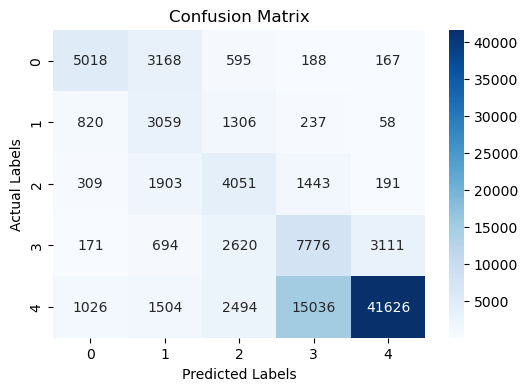

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true_multi, y_pred_multi)
cm
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show() 

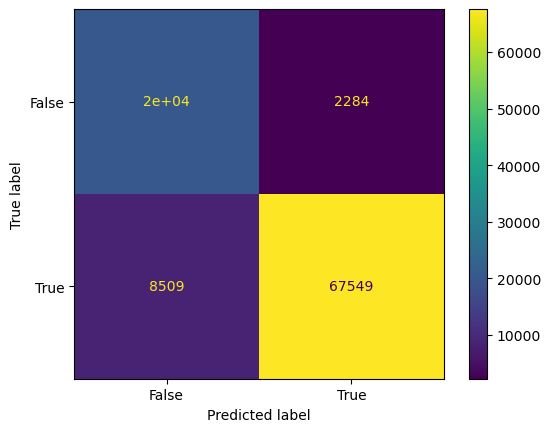

In [77]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(y_true_binary, y_pred_bin)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Attempt FineTuning

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [13]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 8.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 12.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.9 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 30.7 MB/s eta 0:00:0000:

In [14]:
import tensorflow as tf
ds = tf.data.Dataset.from_tensor_slices(dict(df))

2023-04-23 17:41:39.350287: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 17:41:39.401783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 17:41:40.304498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-23 17:41:44.236974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at http

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [21]:
from sklearn.model_selection import train_test_split
train_texts = df['Text'][0:10000].values.tolist()
train_labels = df['Score'][0:10000].values.tolist()
#test_texts = test['Review'].values.tolist()
#train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2,random_state=42,stratify=train_labels)
train_text, val_texts, train_label, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.2, random_state=1)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    train_text, train_label, test_size=0.25, random_state=1)

In [22]:
train_labels[0]

5

In [23]:
import torch
from torch.utils.data import Dataset
from transformers import DistilBertTokenizerFast,DistilBertForSequenceClassification
from transformers import Trainer,TrainingArguments

In [24]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True,return_tensors = 'pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True,return_tensors = 'pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True,return_tensors = 'pt')

In [25]:
#https://medium.com/nerd-for-tech/fine-tuning-pretrained-bert-for-sentiment-classification-using-transformers-in-python-931ed142e37
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
## Test Dataset
class SentimentTestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item
    def __len__(self):
        return len(self.encodings)

In [26]:
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentTestDataset(test_encodings)

In [27]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    f1 = f1_score(labels, pred, average='weighted')

    return {"accuracy": accuracy,"f1_score":f1}

In [32]:
training_args = TrainingArguments(
    output_dir='./res',          # output directory
    evaluation_strategy="steps",
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=1,  # batch size per device during training
    per_device_eval_batch_size=1,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs4',            # directory for storing logs
    #logging_steps=10,
    load_best_model_at_end=True,
)

In [33]:
#model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=3)
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

trainer = Trainer(
    model=model,# the instantiated 🤗 Transformers model to be trained
    args=training_args, # training arguments, defined above
    train_dataset=train_dataset,# training dataset
    eval_dataset=val_dataset , # evaluation dataset
    compute_metrics=compute_metrics,
)

trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 312.00 MiB (GPU 0; 14.62 GiB total capacity; 13.60 GiB already allocated; 41.94 MiB free; 13.66 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
trainer.evaluate()

In [11]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = df['Text'].map(tokenize_function, batched=True)

TypeError: map() got an unexpected keyword argument 'batched'

In [ ]:
encoded_text = tokenizer(df['Text'], return_tensors='pt')
output = model(**encoded_text)

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))